# 1 Ingesta Datos

In [395]:
#LECTURA DE LIBRERÍAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Establecer la opción global para el comportamiento futuro
pd.set_option('future.no_silent_downcasting', True)

In [396]:
#IMPORTACIÓN DE LOS DATOS
ruta_archivo1 = 'Internet.xlsx'
ruta_archivo2 = 'mapa_conectividad.xlsx'

archivos_inet = pd.read_excel(ruta_archivo1, sheet_name = None)
archivos_mapa = pd.read_excel(ruta_archivo2, sheet_name = None)


In [397]:
#ACCEDEMOS A NOMBRE DE LAS HOJAS
print(archivos_inet.keys())
print(archivos_mapa.keys())

dict_keys(['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Velocidad % por prov', 'Totales VMD', 'Accesos_tecnologia_localidad', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Dial-BAf', 'Totales Dial-BAf', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por velocidad', 'Accesos por velocidad', 'Ingresos'])
dict_keys(['Hoja3'])


In [398]:
#DATAFRAMES A OCUPAR
df_acceso_velocidad_localidad_sr = archivos_inet['Acc_vel_loc_sinrangos']
df_acceso_velocidad_provincia_cr = archivos_inet['Accesos por velocidad']
df_acceso_tecnologia_provincia = archivos_inet['Accesos Por Tecnología']
df_acceso_tecnologia_localidad = archivos_inet['Accesos_tecnologia_localidad']
df_penetracion_hogares = archivos_inet['Penetracion-hogares']
df_ingresos = archivos_inet['Ingresos']
df_mapa_conectividad = archivos_mapa['Hoja3']


---

# 2. Nulos, duplicados, valores faltantes y outliers

## 2.1 df_acceso_velocidad_localidad_sr

In [399]:
df_acceso_velocidad_localidad_sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Columns: 136 entries, Provincia to 1024 Mbps
dtypes: float64(132), object(4)
memory usage: 3.2+ MB


In [400]:
#DESCARTAMOS LAS FILAS QUE TIENEN COMO VALORES EN COLUMNA 'LINK INDEC' DE 'Sin Datos'
df_acceso_velocidad_localidad_sr = df_acceso_velocidad_localidad_sr[df_acceso_velocidad_localidad_sr['Link Indec']!= 'Sin Datos']

### 2.1.1  NULOS

In [401]:
df_acceso_velocidad_localidad_sr.head(3)

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,540 Mbps,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,2.000,NaN,19.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,1.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [402]:
df_acceso_velocidad_localidad_sr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2991 entries, 0 to 3065
Columns: 136 entries, Provincia to 1024 Mbps
dtypes: float64(132), object(4)
memory usage: 3.1+ MB


In [403]:
#VERIFICAMOS LOS VALORES NULOS
df_acceso_velocidad_localidad_sr.isnull().sum()

Provincia        0
Partido          0
Localidad        0
Link Indec       0
Otros         2143
              ... 
850 Mbps      2990
900 Mbps      2990
999 Mbps      2974
1000 Mbps     2573
1024 Mbps     2991
Length: 136, dtype: int64

In [404]:
#RELLENAMOS LOS VALORES NULOS
df_acceso_velocidad_localidad_sr.fillna(0, inplace=True)

C:\Users\rcsma\AppData\Local\Temp\ipykernel_35552\489750383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acceso_velocidad_localidad_sr.fillna(0, inplace=True)


In [405]:
df_acceso_velocidad_localidad_sr.head(3)

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,540 Mbps,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.000,0.000,2.000,0.000,19.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


### 2.1.2  DUPLICADOS

In [406]:
#VEMOS LOS DUPLICADOS
df_acceso_velocidad_localidad_sr.duplicated().sum()

0

### 2.3.3.   VALORES FALTANTES

In [407]:
df_acceso_velocidad_localidad_sr.isnull().sum()

Provincia     0
Partido       0
Localidad     0
Link Indec    0
Otros         0
             ..
850 Mbps      0
900 Mbps      0
999 Mbps      0
1000 Mbps     0
1024 Mbps     0
Length: 136, dtype: int64

In [408]:
#SE OBSERVAN LOS VALORES UNICOS DE LAS COLUMNAS PROVINCIA
df_acceso_velocidad_localidad_sr['Provincia'].unique()

array(['BUENOS AIRES', 'CABA', 'CATAMARCA', 'CHACO', 'CHUBUT', 'CORDOBA',
       'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA',
       'LA RIOJA', 'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA',
       'SAN JUAN', 'SAN LUIS', 'SANTA CRUZ', 'SANTA FE',
       'SANTIAGO DEL ESTERO', 'TIERRA DEL FUEGO', 'TUCUMAN'], dtype=object)

In [409]:
#SE ELIMINA COLUMNA QUE EN VEZ DE CONTENER LA LOCACLIDAD CONTIENE LA MISMA PROVINCIA EN 3 COLLUMNAS : PROVINCIA, PARTIDO Y LOCALIDAD LO CUAL GENERABA OUTLIERS.
df_acceso_velocidad_localidad_sr = df_acceso_velocidad_localidad_sr[df_acceso_velocidad_localidad_sr['Provincia'] != 'CABA']


In [410]:
df_acceso_velocidad_localidad_sr['Provincia'].unique()

array(['BUENOS AIRES', 'CATAMARCA', 'CHACO', 'CHUBUT', 'CORDOBA',
       'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA',
       'LA RIOJA', 'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA',
       'SAN JUAN', 'SAN LUIS', 'SANTA CRUZ', 'SANTA FE',
       'SANTIAGO DEL ESTERO', 'TIERRA DEL FUEGO', 'TUCUMAN'], dtype=object)

In [411]:
df_acceso_velocidad_localidad_sr['Link Indec'] = df_acceso_velocidad_localidad_sr['Link Indec'].astype(int) 

In [412]:
df_acceso_velocidad_localidad_sr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2990 entries, 0 to 3065
Columns: 136 entries, Provincia to 1024 Mbps
dtypes: float64(132), int32(1), object(3)
memory usage: 3.1+ MB


### 2.1.4  OUTLIERS 

In [413]:
df_acceso_velocidad_localidad_sr.describe()

,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,"1,5 Mbps",2 Mbps,"2,2 Mbps",...,540 Mbps,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps
count,2990.000,2990.000,2990.000,2990.000,2990.000,2990.000,2990.000,2990.000,2990.000,2990.000,...,2990.000,2990.000,2990.000,2990.000,2990.000,2990.000,2990.000,2990.000,2990.000,2990.000
mean,39616977.040,65.457,0.025,0.685,0.364,3.321,19.095,0.665,23.204,0.006,...,0.030,7.729,0.002,0.001,0.218,0.000,0.037,0.011,60.467,0.000
std,29755346.169,632.462,0.421,5.224,2.052,29.955,101.449,22.021,139.713,0.329,...,1.628,100.553,0.091,0.026,10.390,0.018,2.012,0.169,352.456,0.000
min,6007010.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,10084092.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,34014065.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,66140047.500,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,94014020.000,24223.000,20.000,206.000,61.000,908.000,2085.000,1170.000,3530.000,18.000,...,89.000,3292.000,5.000,1.000,563.000,1.000,110.000,5.000,10350.000,0.000


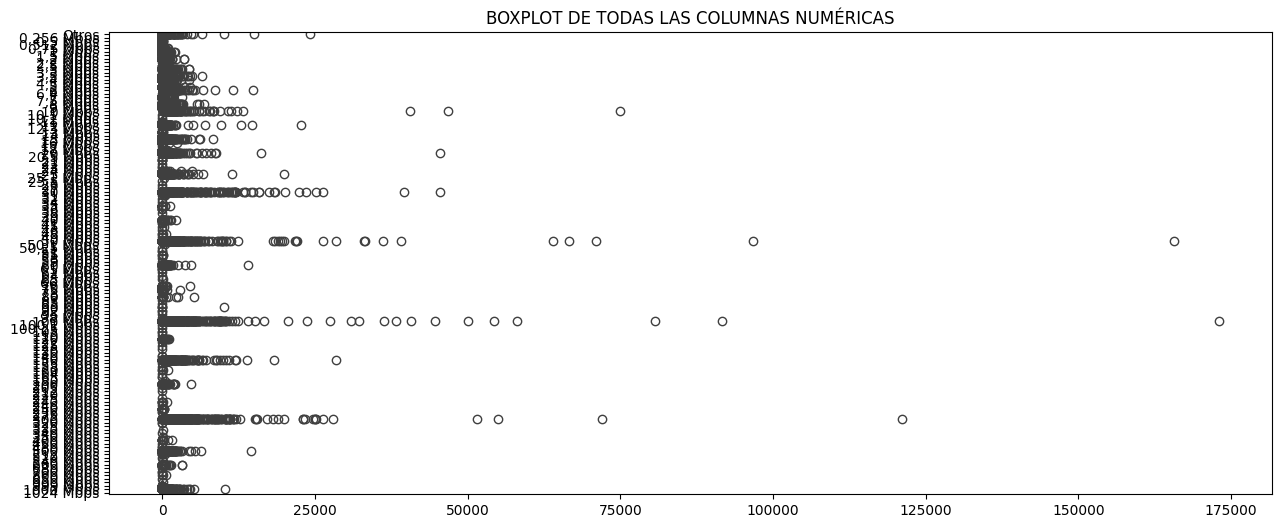

In [414]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df_acceso_velocidad_localidad_sr.iloc[:, 4:], orient='h')
plt.title('BOXPLOT DE TODAS LAS COLUMNAS NUMÉRICAS')
plt.show()

En este caso, dado que se presentan valores muy lejanos al promedio es posible el uso de los percentiles para poder disminuir estos valores my alejados.

In [415]:
#REALIZAMOS PERCENTIL CON EL FIN DE ELIMINAR SESGOS
q1 = df_acceso_velocidad_localidad_sr.iloc[:, 4:].quantile(0.05)
q3 = df_acceso_velocidad_localidad_sr.iloc[:, 4:].quantile(0.95)
iqr = q3 - q1

limite_inferior = 0
limite_superior = q3+1.5*iqr
# df_acceso_velocidad_localidad_sr_filtrado = df_acceso_velocidad_localidad_sr[(df_acceso_velocidad_localidad_sr.iloc[:, 4:133] >= limite_inferior) & (df_acceso_velocidad_localidad_sr.iloc[:, 4:133] <= limite_superior)]
df_acceso_velocidad_localidad_sr_filtrado = df_acceso_velocidad_localidad_sr.copy()
df_acceso_velocidad_localidad_sr_filtrado[df_acceso_velocidad_localidad_sr.columns[4:]] = df_acceso_velocidad_localidad_sr[df_acceso_velocidad_localidad_sr.columns[4:]][(df_acceso_velocidad_localidad_sr[df_acceso_velocidad_localidad_sr.columns[4:]] >= limite_inferior) & (df_acceso_velocidad_localidad_sr[df_acceso_velocidad_localidad_sr.columns[4:]] <= limite_superior)]

In [416]:
df_acceso_velocidad_localidad_sr_filtrado.head(3)

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,540 Mbps,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.000,0.000,2.000,0.000,19.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [417]:
df_acceso_velocidad_localidad_sr.describe()

,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,"1,5 Mbps",2 Mbps,"2,2 Mbps",...,540 Mbps,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps
count,2990.000,2990.000,2990.000,2990.000,2990.000,2990.000,2990.000,2990.000,2990.000,2990.000,...,2990.000,2990.000,2990.000,2990.000,2990.000,2990.000,2990.000,2990.000,2990.000,2990.000
mean,39616977.040,65.457,0.025,0.685,0.364,3.321,19.095,0.665,23.204,0.006,...,0.030,7.729,0.002,0.001,0.218,0.000,0.037,0.011,60.467,0.000
std,29755346.169,632.462,0.421,5.224,2.052,29.955,101.449,22.021,139.713,0.329,...,1.628,100.553,0.091,0.026,10.390,0.018,2.012,0.169,352.456,0.000
min,6007010.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,10084092.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,34014065.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,66140047.500,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,94014020.000,24223.000,20.000,206.000,61.000,908.000,2085.000,1170.000,3530.000,18.000,...,89.000,3292.000,5.000,1.000,563.000,1.000,110.000,5.000,10350.000,0.000


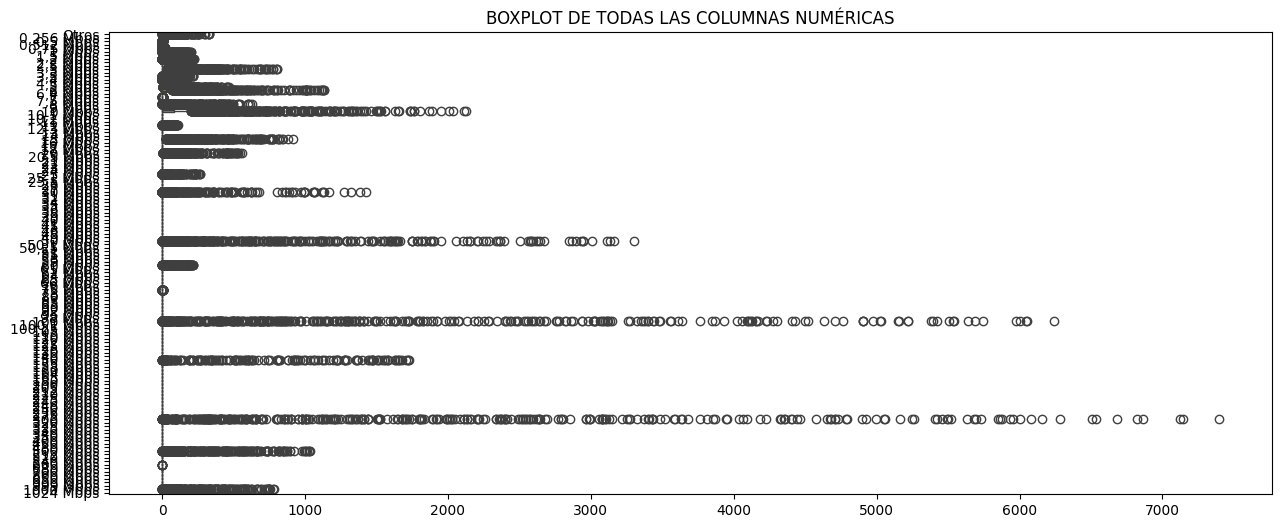

In [418]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df_acceso_velocidad_localidad_sr_filtrado.iloc[:,4:], orient='h')
plt.title('BOXPLOT DE TODAS LAS COLUMNAS NUMÉRICAS')
plt.show()

---

## 2.1 df_acceso_velocidad_provincia_cr

In [419]:
df_acceso_velocidad_provincia_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  960 non-null    int64  
 1   Trimestre            960 non-null    int64  
 2   Provincia            960 non-null    object 
 3   HASTA 512 kbps       960 non-null    float64
 4   + 512 Kbps - 1 Mbps  960 non-null    float64
 5   + 1 Mbps - 6 Mbps    960 non-null    float64
 6   + 6 Mbps - 10 Mbps   960 non-null    float64
 7   + 10 Mbps - 20 Mbps  960 non-null    float64
 8   + 20 Mbps - 30 Mbps  960 non-null    float64
 9   + 30 Mbps            960 non-null    float64
 10  OTROS                954 non-null    float64
 11  Total                960 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 90.1+ KB


In [420]:
df_acceso_velocidad_provincia_cr.head(3)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,4,Buenos Aires,26909.000,23962.000,228393.000,239339.000,246144.000,110876.000,4042646.000,93351.000,5011620.000
1,2024,4,Capital Federal,516.000,4544.000,26409.000,48083.000,33925.000,5829.000,1355061.000,0.000,1474367.000
2,2024,4,Catamarca,71.000,209.000,3065.000,3734.000,4423.000,1827.000,61181.000,77.000,74587.000


### 2.1.1 NULOS

In [421]:
df_acceso_velocidad_provincia_cr.isnull().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64

In [422]:
df_acceso_velocidad_provincia_cr.fillna(0, inplace=True)

In [423]:
df_acceso_velocidad_provincia_cr.isnull().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  0
Total                  0
dtype: int64

### 2.1.2. DUPLICADOS

In [424]:
df_acceso_velocidad_provincia_cr.duplicated().sum()

0

### 2.1.3 VALORES FALTANTES

In [425]:
print(df_acceso_velocidad_provincia_cr['Año'].unique())
print(df_acceso_velocidad_provincia_cr['Trimestre'].unique())
print(df_acceso_velocidad_provincia_cr['Provincia'].unique())

[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
[4 3 2 1]
['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán']


In [426]:
#REEMPLAZO DE VALORES EN COLUMNA 'AÑO' 2024 A 2023
df_acceso_velocidad_provincia_cr['Año'] = df_acceso_velocidad_provincia_cr['Año'].replace({2024: 2023})

In [427]:
df_acceso_velocidad_provincia_cr['Año'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014],
      dtype=int64)

### 2.1.4 OUTLIERS

In [428]:
df_acceso_velocidad_provincia_cr.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000
mean,2018.500,2.500,1986.276,9291.107,137188.509,38112.431,37303.289,20197.091,109885.055,6043.608,360007.367
std,2.874,1.119,12889.165,21018.938,328174.836,64565.359,89536.515,70534.758,434785.786,14503.711,774085.159
min,2014.000,1.000,6.000,0.000,1483.000,0.000,0.000,0.000,0.000,-1945.000,12406.000
25%,2016.000,1.750,40.750,347.250,24511.500,3581.000,2127.500,36.750,10.750,0.000,58824.000
50%,2018.500,2.500,107.000,2263.500,44254.000,12913.500,10082.000,1391.500,2418.500,58.000,109705.000
75%,2021.000,3.250,468.000,7227.500,84395.000,40126.000,26436.000,9858.750,35332.250,6485.250,188079.250
max,2023.000,4.000,238920.000,171244.480,2299705.320,403575.000,886678.000,949093.000,4042646.000,122762.000,5011620.000


In [429]:
df_acceso_velocidad_provincia_cr.columns

Index(['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total'],
      dtype='object')

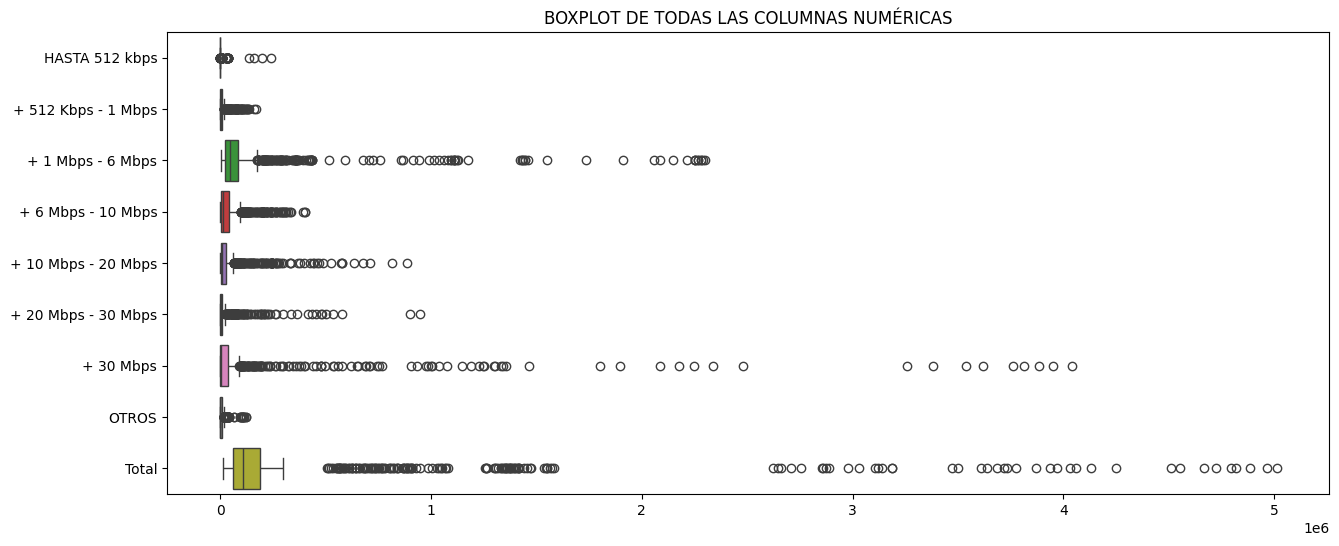

In [430]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df_acceso_velocidad_provincia_cr.iloc[:,3:], orient='h')
plt.title('BOXPLOT DE TODAS LAS COLUMNAS NUMÉRICAS')
plt.show()

De este boxplot es apreciable que no se presentan outliers, los datos elevados que se encuentran son dado los grandes valores presentes por ser una columna de la suma de los valores presentes en las otras columnas de rangos de mbps

---

## 2.2 df_acceso_tecnologia_provincia

In [431]:
df_acceso_tecnologia_provincia.head(3)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2023,4,Buenos Aires,223391.000,2797700.000,1784593.000,137993.000,67943.000,5011620.000
1,2023,4,Capital Federal,58700.000,1198835.000,182520.000,4492.000,29820.000,1474367.000
2,2023,4,Catamarca,6669.000,11016.000,55437.000,1384.000,81.000,74587.000


In [432]:
df_acceso_tecnologia_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           961 non-null    object 
 1   Trimestre     961 non-null    object 
 2   Provincia     960 non-null    object 
 3   ADSL          960 non-null    float64
 4   Cablemodem    960 non-null    float64
 5   Fibra óptica  960 non-null    float64
 6   Wireless      960 non-null    float64
 7   Otros         960 non-null    float64
 8   Total         960 non-null    float64
dtypes: float64(6), object(3)
memory usage: 67.8+ KB


In [433]:
# Eliminar filas donde 'Columna' tiene el valor específico
df_acceso_tecnologia_provincia = df_acceso_tecnologia_provincia.drop(df_acceso_tecnologia_provincia[df_acceso_tecnologia_provincia['Año'] == '2019 *'].index)

### 2.2.1 NULOS

In [434]:
df_acceso_tecnologia_provincia.isnull().sum()

Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64

In [435]:
df_acceso_tecnologia_provincia = df_acceso_tecnologia_provincia.dropna()

In [436]:
df_acceso_tecnologia_provincia.isnull().sum()

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

In [437]:
#POR ULTIMO SE CAMBIAN LOS TIPOS DE DATOS
df_acceso_tecnologia_provincia['Año'] = df_acceso_tecnologia_provincia['Año'].astype(int)
df_acceso_tecnologia_provincia['Trimestre'] = df_acceso_tecnologia_provincia['Trimestre'].astype(int)

In [438]:
df_acceso_tecnologia_provincia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 959
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           888 non-null    int32  
 1   Trimestre     888 non-null    int32  
 2   Provincia     888 non-null    object 
 3   ADSL          888 non-null    float64
 4   Cablemodem    888 non-null    float64
 5   Fibra óptica  888 non-null    float64
 6   Wireless      888 non-null    float64
 7   Otros         888 non-null    float64
 8   Total         888 non-null    float64
dtypes: float64(6), int32(2), object(1)
memory usage: 62.4+ KB


### 2.2.2 DUPLICADOS

In [439]:
df_acceso_tecnologia_provincia.duplicated().sum()

0

### 2.2.3 VALORES FALTANTES

In [440]:
df_acceso_tecnologia_provincia.columns

Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')

In [441]:
print(df_acceso_tecnologia_provincia['Año'].unique())
print(df_acceso_tecnologia_provincia['Trimestre'].unique())
print(df_acceso_tecnologia_provincia['Provincia'].unique())

[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
[4 3 2 1]
['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán']


### 2.2.4 OUTLIERS

In [442]:
df_acceso_tecnologia_provincia.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,888.000,888.000,888.000,888.000,888.000,888.000,888.000,888.000
mean,2018.459,2.541,115588.316,180741.538,46173.375,12010.979,6191.300,360705.508
std,2.984,1.130,239543.237,445699.223,173362.667,20712.452,11151.427,776865.158
min,2014.000,1.000,3296.000,0.000,0.000,0.000,2.000,12557.000
25%,2016.000,2.000,21056.500,10058.500,333.250,455.250,313.000,58313.000
50%,2018.000,3.000,45380.500,39340.000,2576.000,4907.000,1803.500,110110.000
75%,2021.000,4.000,91587.750,75780.500,25187.750,13547.000,6976.750,188351.750
max,2023.000,4.000,1586343.000,2797700.000,1784593.000,138405.000,73415.000,5011620.000


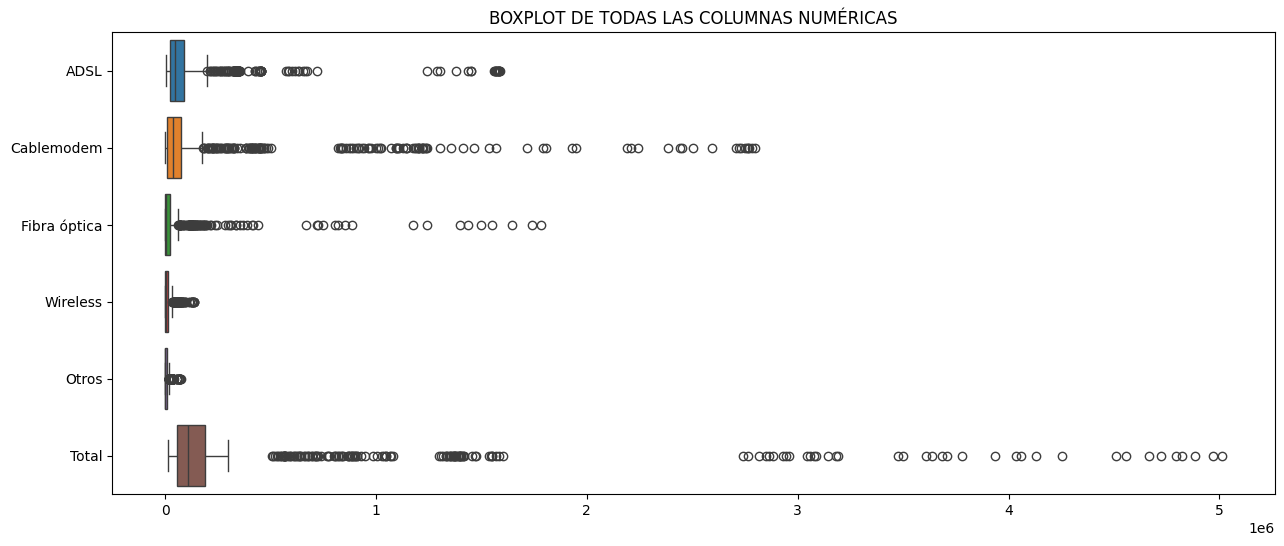

In [443]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df_acceso_tecnologia_provincia.iloc[:,3:], orient='h')
plt.title('BOXPLOT DE TODAS LAS COLUMNAS NUMÉRICAS')
plt.show()

Al igual que el Dataframe anterior se presenten valores elevados para la columna total pero esto no quiere decir que puedan ser outliers, ya que corresponden a la suma de los valores de las otras columnas

---

## 2.4 df_acceso_tecnologia_localidad

In [444]:
df_acceso_tecnologia_localidad.head(3)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,756,4600,0,3,0,742,0,726,6827
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181


In [445]:
df_acceso_tecnologia_localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3076 non-null   object
 1   Partido        3076 non-null   object
 2   Localidad      3076 non-null   object
 3   Link Indec     3076 non-null   object
 4   ADSL           3076 non-null   int64 
 5   CABLEMODEM     3076 non-null   int64 
 6   DIAL UP        3076 non-null   int64 
 7   FIBRA OPTICA   3076 non-null   int64 
 8   OTROS          3076 non-null   int64 
 9   SATELITAL      3076 non-null   int64 
 10  WIMAX          3076 non-null   int64 
 11  WIRELESS       3076 non-null   int64 
 12  Total general  3076 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 312.5+ KB


In [446]:
#DESCARTAMOS LAS FILAS QUE TIENEN COMO VALORES EN COLUMNA 'LINK INDEC' DE 'Sin Datos'
df_acceso_tecnologia_localidad = df_acceso_tecnologia_localidad[df_acceso_tecnologia_localidad['Link Indec']!= 'Sin Datos']

In [447]:
# Convertir la columna 'Link Indec' a tipo int y asignarlo de nuevo a la columna
df_acceso_tecnologia_localidad.loc[:, 'Link Indec'] = df_acceso_tecnologia_localidad['Link Indec'].astype(int)

In [448]:
df_acceso_tecnologia_localidad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3006 entries, 0 to 3075
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3006 non-null   object
 1   Partido        3006 non-null   object
 2   Localidad      3006 non-null   object
 3   Link Indec     3006 non-null   object
 4   ADSL           3006 non-null   int64 
 5   CABLEMODEM     3006 non-null   int64 
 6   DIAL UP        3006 non-null   int64 
 7   FIBRA OPTICA   3006 non-null   int64 
 8   OTROS          3006 non-null   int64 
 9   SATELITAL      3006 non-null   int64 
 10  WIMAX          3006 non-null   int64 
 11  WIRELESS       3006 non-null   int64 
 12  Total general  3006 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 328.8+ KB


### 2.4.1 NULOS

In [449]:
df_acceso_tecnologia_localidad.isnull().sum()

Provincia        0
Partido          0
Localidad        0
Link Indec       0
ADSL             0
CABLEMODEM       0
DIAL UP          0
FIBRA OPTICA     0
OTROS            0
SATELITAL        0
WIMAX            0
WIRELESS         0
Total general    0
dtype: int64

### 2.4.2. DUPLICADOS

In [450]:
df_acceso_tecnologia_localidad.duplicated().sum()

0

### 2.4.3. VALORES FALTANTES

In [451]:
df_acceso_tecnologia_localidad.columns

Index(['Provincia', 'Partido', 'Localidad', 'Link Indec', 'ADSL', 'CABLEMODEM',
       'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS',
       'Total general'],
      dtype='object')

In [452]:
print(df_acceso_tecnologia_localidad['Provincia'].unique())
# print(df_acceso_tecnologia_localidad['Partido'].unique())
print(df_acceso_tecnologia_localidad['Localidad'].unique())

['BUENOS AIRES' 'CABA' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CORDOBA' 'CORRIENTES'
 'ENTRE RIOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUEN' 'RIO NEGRO' 'SALTA' 'SAN JUAN' 'San Luis' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMAN']
['25 de Mayo' 'Del Valle' 'Gobernador Ugarte' ... 'Villa  de Trancas'
 'Villa Carmela' 'Yerba Buena - Marcos Paz']


In [453]:
# Eliminar filas donde 'Columna' tiene el valor específico ('CABA')
df_acceso_tecnologia_localidad = df_acceso_tecnologia_localidad.drop(df_acceso_tecnologia_localidad[df_acceso_tecnologia_localidad['Provincia'] == 'CABA'].index)

In [454]:
df_acceso_tecnologia_localidad['Provincia'].unique()

array(['BUENOS AIRES', 'CATAMARCA', 'CHACO', 'CHUBUT', 'CORDOBA',
       'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA',
       'LA RIOJA', 'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA',
       'SAN JUAN', 'San Luis', 'SANTA CRUZ', 'SANTA FE',
       'SANTIAGO DEL ESTERO', 'TIERRA DEL FUEGO', 'TUCUMAN'], dtype=object)

### 2.4.4 OUTLIERS

In [455]:
df_acceso_tecnologia_localidad.columns

Index(['Provincia', 'Partido', 'Localidad', 'Link Indec', 'ADSL', 'CABLEMODEM',
       'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS',
       'Total general'],
      dtype='object')

In [456]:
df_acceso_tecnologia_localidad.iloc[:, 4:].describe()

,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
count,3005.000,3005.000,3005.000,3005.000,3005.000,3005.000,3005.000,3005.000,3005.000
mean,258.793,1604.901,3.242,1239.707,35.440,0.937,0.728,192.495,3336.245
std,1150.572,8462.113,22.624,7900.900,374.270,13.735,15.270,715.832,16592.037
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,30.000
50%,0.000,0.000,0.000,1.000,0.000,0.000,0.000,30.000,176.000
75%,90.000,15.000,0.000,172.000,0.000,1.000,0.000,129.000,1088.000
max,33288.000,210807.000,517.000,269623.000,15003.000,742.000,444.000,19906.000,519359.000


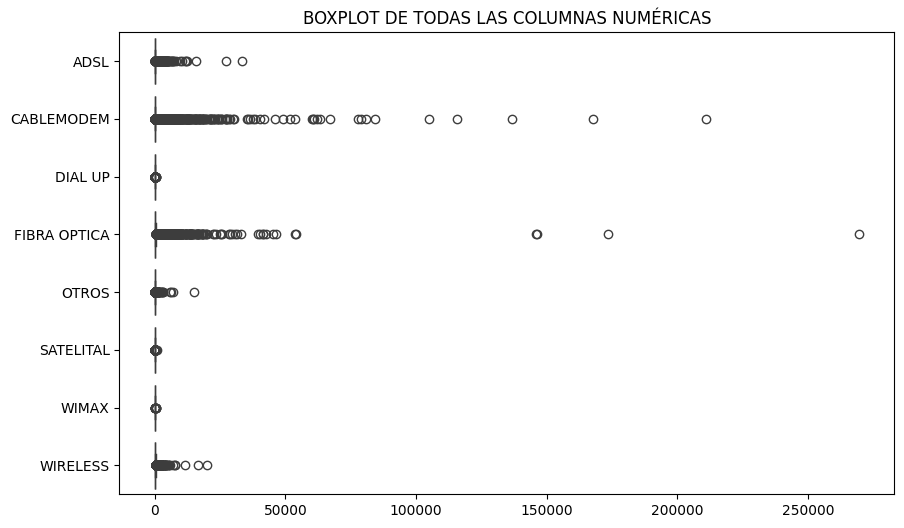

In [457]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df_acceso_tecnologia_localidad.iloc[:, 4:12], orient='h')
plt.title('BOXPLOT DE TODAS LAS COLUMNAS NUMÉRICAS')
plt.show()

es posible observar valores que se alejan bastante de lo normal por lo que se decide el uso de los percentiles y adecuar los datos a algo más preciso y evitar sesgos

In [458]:
#REALIZAMOS PERCENTIL CON EL FIN DE ELIMINAR SESGOS
q1 = df_acceso_tecnologia_localidad.iloc[:, 4:].quantile(0.5)
q3 = df_acceso_tecnologia_localidad.iloc[:, 4:].quantile(0.95)
iqr = q3 - q1

limite_inferior = 0
limite_superior = q3+1.5*iqr
df_acceso_tecnologia_localidad_filtrado = df_acceso_tecnologia_localidad.copy()
df_acceso_tecnologia_localidad_filtrado[df_acceso_tecnologia_localidad.columns[4:]] = df_acceso_tecnologia_localidad[df_acceso_tecnologia_localidad.columns[4:]][(df_acceso_tecnologia_localidad[df_acceso_tecnologia_localidad.columns[4:]] >= limite_inferior) & (df_acceso_tecnologia_localidad[df_acceso_tecnologia_localidad.columns[4:]] <= limite_superior)]

In [459]:
df_acceso_tecnologia_localidad_filtrado.head(5)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,756.000,4600.000,0.000,3.000,0.000,NaN,0.000,726.000,6827.000
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181.000,0.000,0.000,0.000,10.000,1.000,0.000,0.000,192.000
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0.000,0.000,0.000,0.000,0.000,0.000,0.000,181.000,181.000
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0.000,782.000,0.000,496.000,16.000,0.000,0.000,185.000,1479.000
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.000,6.000


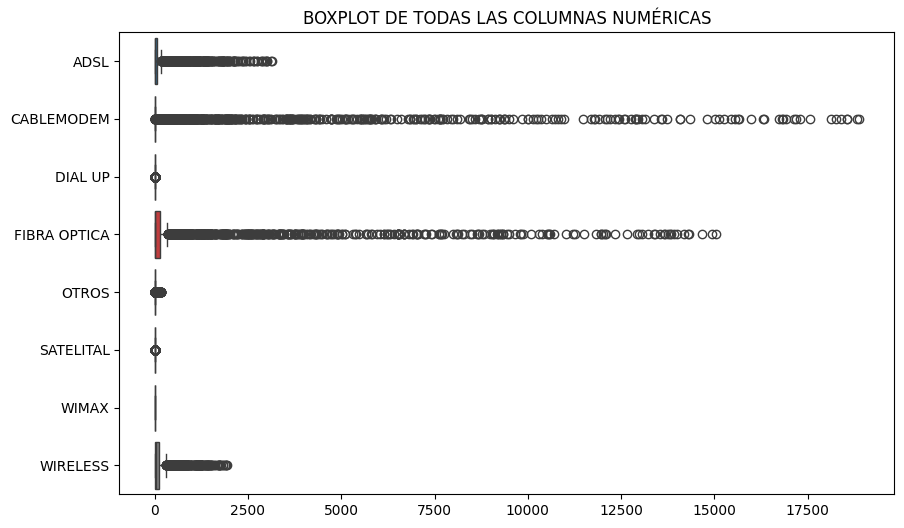

In [460]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df_acceso_tecnologia_localidad_filtrado.iloc[:, 4:12], orient='h')
plt.title('BOXPLOT DE TODAS LAS COLUMNAS NUMÉRICAS')
plt.show()

---

## 2.3 df_penetracion_hogares

In [461]:
df_penetracion_hogares.head(3)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2023,4,Buenos Aires,80.960
1,2023,4,Capital Federal,117.020
2,2023,4,Catamarca,68.630


In [462]:
df_penetracion_hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           960 non-null    int64  
 1   Trimestre                     960 non-null    int64  
 2   Provincia                     960 non-null    object 
 3   Accesos por cada 100 hogares  960 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.1+ KB


### 2.3.1 NULO

In [463]:
df_penetracion_hogares.isnull().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

### 2.3.2 DUPLICADOS

In [464]:
df_penetracion_hogares.duplicated().sum()

0

### 2.3.3 VALORES FALTANTES

In [465]:
print(df_penetracion_hogares['Año'].unique())
print(df_penetracion_hogares['Provincia'].unique())

[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán']


### 2.3.4 OUTLIERS

In [466]:
df_penetracion_hogares.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,960.000,960.000,960.000
mean,2018.500,2.500,51.662
std,2.874,1.119,23.898
min,2014.000,1.000,9.347
25%,2016.000,1.750,32.857
50%,2018.500,2.500,48.817
75%,2021.000,3.250,65.117
max,2023.000,4.000,124.061


In [467]:
df_penetracion_hogares.columns

Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares'], dtype='object')

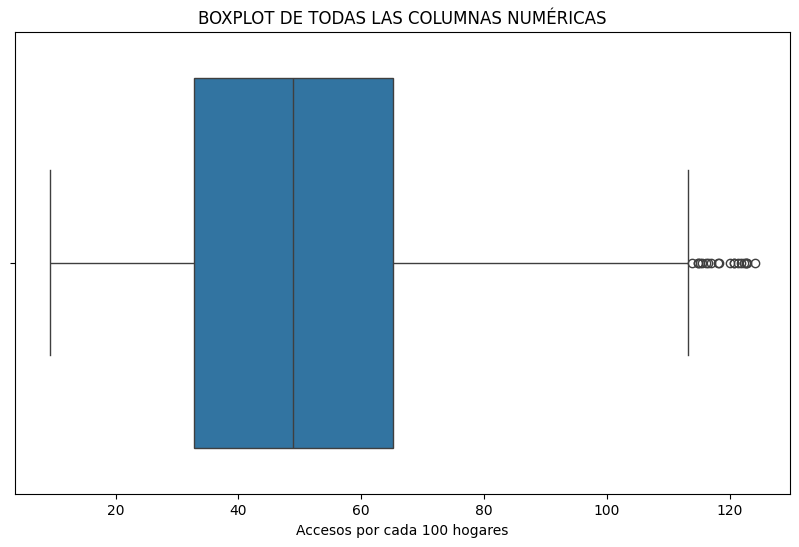

In [468]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df_penetracion_hogares.iloc[:, 3], orient='h')
plt.title('BOXPLOT DE TODAS LAS COLUMNAS NUMÉRICAS')
plt.show()

En este caso se pueden apreciar valores que se encuentran fuera del promedio, pero este se puede deber a que hay provincias que presentan una mayor facilidad para obtener acceso a internet

---

## 2.4 df_ingresos

In [469]:
df_ingresos.head(3)

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2023,4,167376014.800,Oct-Dic 2023
1,2023,3,133106593.410,Jul-Sept 2023
2,2023,2,118060280.280,Jun-Mar 2023


In [470]:
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        40 non-null     int64  
 1   Trimestre                  40 non-null     int64  
 2   Ingresos (miles de pesos)  40 non-null     float64
 3   Periodo                    40 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


### 2.4.1 NULOS

In [471]:
df_ingresos.isnull().sum()

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

### 2.4.2 DUPLICADOS

In [472]:
df_ingresos.duplicated().sum()

0

### 2.4.3 VALORES FALTANTES

In [473]:
print(df_ingresos['Año'].unique())
print(df_ingresos['Trimestre'].unique())
print(df_ingresos['Periodo'].unique())

[2023 2033 2022 2021 2020 2019 2018 2017 2016 2015 2014]
[4 3 2 1]
['Oct-Dic 2023' 'Jul-Sept 2023' 'Jun-Mar 2023' 'Ene-Mar 2023'
 'Oct-Dic 2022' 'Jul-Sept 2022' 'Abr-Jun 2022' 'Ene-Mar 2022'
 'Oct-Dic 2021' 'Jul-Sept 2021' 'Abr-Jun 2021' 'Ene-Mar 2021'
 'Oct-Dic 2020' 'Jul-Sept 2020' 'Abr-Jun 2020' 'Ene-Mar 2020'
 'Oct-Dic 2019' 'Jul-Sept 2019' 'Abr-Jun 2019' 'Ene-Mar 2019'
 'Oct-Dic 2018' 'Jul-Sept 2018' 'Abr-Jun 2018' 'Ene-Mar 2018'
 'Oct-Dic 2017' 'Jul-Sept 2017' 'Abr-Jun 2017' 'Ene-Mar 2017'
 'Oct-Dic 2016' 'Jul-Sept 2016' 'Abr-Jun 2016' 'Ene-Mar 2016'
 'Oct-Dic 2015' 'Jul-Sept 2015' 'Abr-Jun 2015' 'Ene-Mar 2015'
 'Oct-Dic 2014' 'Jul-Sept 2014' 'Abr-Jun 2014' 'Ene-Mar 2014']


In [474]:
#REEMPLAZO DE AÑO 2033 POR 2023 YA QUE NO CALZABA EN LOS AÑOS.
df_ingresos['Año'] = df_ingresos['Año'].replace({2033: 2023})
df_ingresos['Periodo'] = df_ingresos['Periodo'].replace({'Jun-Mar 2023': 'Abr-Jun 2023'})

In [475]:
print(df_ingresos['Año'].unique())
print(df_ingresos['Trimestre'].unique())
print(df_ingresos['Periodo'].unique())

[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
[4 3 2 1]
['Oct-Dic 2023' 'Jul-Sept 2023' 'Abr-Jun 2023' 'Ene-Mar 2023'
 'Oct-Dic 2022' 'Jul-Sept 2022' 'Abr-Jun 2022' 'Ene-Mar 2022'
 'Oct-Dic 2021' 'Jul-Sept 2021' 'Abr-Jun 2021' 'Ene-Mar 2021'
 'Oct-Dic 2020' 'Jul-Sept 2020' 'Abr-Jun 2020' 'Ene-Mar 2020'
 'Oct-Dic 2019' 'Jul-Sept 2019' 'Abr-Jun 2019' 'Ene-Mar 2019'
 'Oct-Dic 2018' 'Jul-Sept 2018' 'Abr-Jun 2018' 'Ene-Mar 2018'
 'Oct-Dic 2017' 'Jul-Sept 2017' 'Abr-Jun 2017' 'Ene-Mar 2017'
 'Oct-Dic 2016' 'Jul-Sept 2016' 'Abr-Jun 2016' 'Ene-Mar 2016'
 'Oct-Dic 2015' 'Jul-Sept 2015' 'Abr-Jun 2015' 'Ene-Mar 2015'
 'Oct-Dic 2014' 'Jul-Sept 2014' 'Abr-Jun 2014' 'Ene-Mar 2014']


### 2.6.4 OUTLIERS

In [476]:
df_ingresos.iloc[:, 2].describe()

count          40.000
mean     32811526.002
std      38503038.835
min       2984054.209
25%       6817891.304
50%      18422550.180
75%      39429736.048
max     167376014.800
Name: Ingresos (miles de pesos), dtype: float64

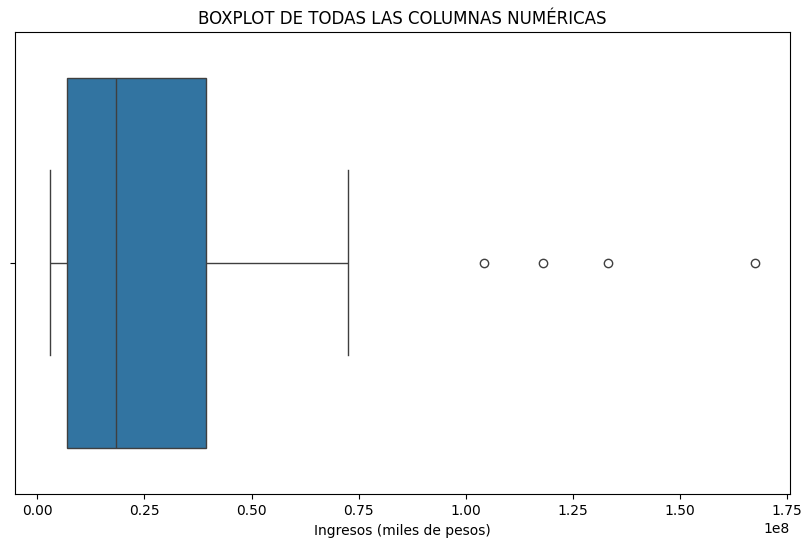

In [477]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df_ingresos.iloc[:, 2], orient='h')
plt.title('BOXPLOT DE TODAS LAS COLUMNAS NUMÉRICAS')
plt.show()

Al igual que en el dataframe de acceso por hogares tenemos 4 valores que se encuentran fuera del promedio de los datos por lo que se utilizan los percentiles para acotar los datoos

In [478]:
#REALIZAMOS PERCENTIL CON EL FIN DE ELIMINAR PERCENTIL
q1 = df_ingresos.iloc[:, 2].quantile(0.5)
q3 = df_ingresos.iloc[:, 2].quantile(0.75) #EN ESTE CASO SE AJUSTA EL PERCENTIL CON EL FIN DE ELIMINAR TODOS LOS OUTLIERS
iqr = q3 - q1

limite_inferior = 0
limite_superior = q3+1.5*iqr
df_ingresos_filtrado = df_ingresos.copy()
df_ingresos_filtrado[df_ingresos.columns[2]] = df_ingresos[df_ingresos.columns[2]][(df_ingresos[df_ingresos.columns[2]] >= limite_inferior) & (df_ingresos[df_ingresos.columns[2]] <= limite_superior)]

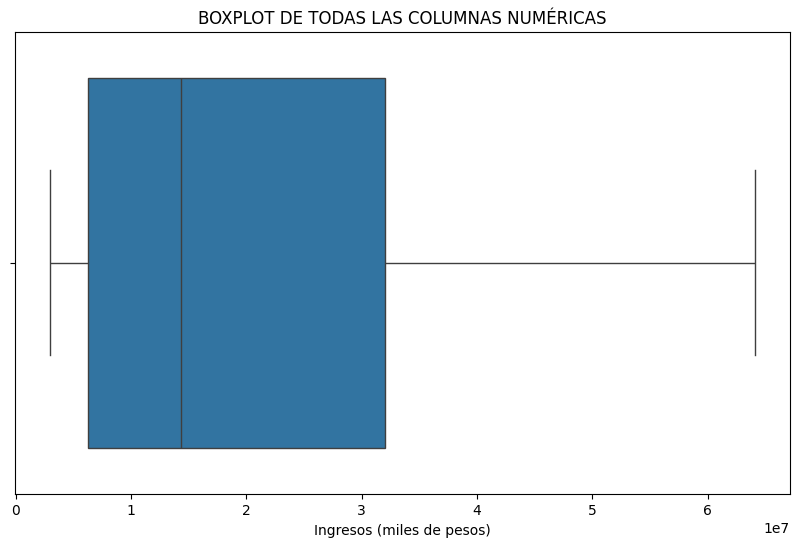

In [479]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df_ingresos_filtrado.iloc[:, 2], orient='h')
plt.title('BOXPLOT DE TODAS LAS COLUMNAS NUMÉRICAS')
plt.show()

---

## 2.7 df_mapa_conectividad

In [480]:
df_mapa_conectividad.head(3)

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,Sí,--,--,--,--,--,Sí,Sí,Sí,6588010.000,-35.293,-61.407
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,--,--,--,--,--,--,Sí,Sí,Sí,6588020.000,-35.239,-60.825
2,BUENOS AIRES,9 de Julio,Dudignac,2670,--,--,Sí,--,--,Sí,Sí,Sí,Sí,6588040.000,-35.651,-60.710


In [481]:
df_mapa_conectividad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provincia       4311 non-null   object 
 1   Partido         4311 non-null   object 
 2   Localidad       4311 non-null   object 
 3   Población       4311 non-null   int64  
 4   ADSL            4311 non-null   object 
 5   Cablemódem      4311 non-null   object 
 6   Dial Up         4311 non-null   object 
 7   Fibra óptica    4311 non-null   object 
 8   Satelital       4311 non-null   object 
 9   Wireless        4311 non-null   object 
 10  Telefonía Fija  4311 non-null   object 
 11  3G              4311 non-null   object 
 12  4G              4311 non-null   object 
 13  Link            4299 non-null   float64
 14  Latitud         4311 non-null   float64
 15  Longitud        4311 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory usage: 539.0+ KB


In [482]:
#REEMPLAZAMOS LOS VALORES DE 'SÍ' POR TRUE Y '--' POR FALSE 
df_mapa_conectividad.iloc[:, 4:13] = df_mapa_conectividad.iloc[:, 4:13].replace({'Sí': True, '--': False})
df_mapa_conectividad = df_mapa_conectividad.rename(columns={'Link': 'Link Indec'})



In [483]:
#VERIFICAMOS QUE LAS COLUMNAS QUE CONTENGAN VALORES TRUE Y FALSE SEAN BOOLEANOS
df_mapa_conectividad['ADSL'] = df_mapa_conectividad['ADSL'].astype(bool)
df_mapa_conectividad['Cablemódem'] = df_mapa_conectividad['Cablemódem'].astype(bool)
df_mapa_conectividad['Dial Up'] = df_mapa_conectividad['Dial Up'].astype(bool)
df_mapa_conectividad['Fibra óptica'] = df_mapa_conectividad['Fibra óptica'].astype(bool)
df_mapa_conectividad['Satelital'] = df_mapa_conectividad['Satelital'].astype(bool)
df_mapa_conectividad['Wireless'] = df_mapa_conectividad['Wireless'].astype(bool)
df_mapa_conectividad['Telefonía Fija'] = df_mapa_conectividad['Telefonía Fija'].astype(bool)
df_mapa_conectividad['3G'] = df_mapa_conectividad['3G'].astype(bool)
df_mapa_conectividad['4G'] = df_mapa_conectividad['4G'].astype(bool)


In [484]:
df_mapa_conectividad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provincia       4311 non-null   object 
 1   Partido         4311 non-null   object 
 2   Localidad       4311 non-null   object 
 3   Población       4311 non-null   int64  
 4   ADSL            4311 non-null   bool   
 5   Cablemódem      4311 non-null   bool   
 6   Dial Up         4311 non-null   bool   
 7   Fibra óptica    4311 non-null   bool   
 8   Satelital       4311 non-null   bool   
 9   Wireless        4311 non-null   bool   
 10  Telefonía Fija  4311 non-null   bool   
 11  3G              4311 non-null   bool   
 12  4G              4311 non-null   bool   
 13  Link Indec      4299 non-null   float64
 14  Latitud         4311 non-null   float64
 15  Longitud        4311 non-null   float64
dtypes: bool(9), float64(3), int64(1), object(3)
memory usage: 273.8+ KB


### 2.7.1 NULOS

In [485]:
df_mapa_conectividad.isnull().sum()

Provincia          0
Partido            0
Localidad          0
Población          0
ADSL               0
Cablemódem         0
Dial Up            0
Fibra óptica       0
Satelital          0
Wireless           0
Telefonía Fija     0
3G                 0
4G                 0
Link Indec        12
Latitud            0
Longitud           0
dtype: int64

In [486]:
df_mapa_conectividad.dropna(inplace = True)

In [487]:
df_mapa_conectividad.isnull().sum()

Provincia         0
Partido           0
Localidad         0
Población         0
ADSL              0
Cablemódem        0
Dial Up           0
Fibra óptica      0
Satelital         0
Wireless          0
Telefonía Fija    0
3G                0
4G                0
Link Indec        0
Latitud           0
Longitud          0
dtype: int64

In [488]:
#nos aseguramos despues de eliminados los nulos que la columna Link Indec sea entero
df_mapa_conectividad.loc[:, 'Link Indec'] = df_mapa_conectividad.loc[:, 'Link Indec'].astype(int)

### 2.7.2 DUPLICADOS

In [489]:
df_mapa_conectividad.duplicated().sum()

0

### 2.7.3 VALORES FALTANTES

In [490]:
df_mapa_conectividad.columns

Index(['Provincia', 'Partido', 'Localidad', 'Población', 'ADSL', 'Cablemódem',
       'Dial Up', 'Fibra óptica', 'Satelital', 'Wireless', 'Telefonía Fija',
       '3G', '4G', 'Link Indec', 'Latitud', 'Longitud'],
      dtype='object')

In [491]:
print(df_mapa_conectividad['Provincia'].unique())


['BUENOS AIRES' 'SAN JUAN' 'CABA' 'CORDOBA' 'FORMOSA' 'MENDOZA' 'SALTA'
 'SANTA FE' 'SAN LUIS' 'JUJUY' 'MISIONES' 'RIO NEGRO' 'LA PAMPA'
 'CATAMARCA' 'CHACO' 'CHUBUT' 'NEUQUEN' 'LA RIOJA' 'CORRIENTES'
 'ENTRE RIOS' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'SANTA CRUZ'
 'TUCUMAN']


In [492]:
df_mapa_conectividad.loc[df_mapa_conectividad['Provincia'] =='CABA'].head(3)

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link Indec,Latitud,Longitud
47,CABA,COMUNA 01,MONSERRAT,39914,True,True,True,True,True,True,True,True,True,2000010.000,-34.613,-58.380
54,CABA,COMUNA 11,VILLA SANTA RITA,33325,True,True,True,True,True,True,True,True,True,2000010.000,-34.616,-58.483
216,CABA,COMUNA 01,PUERTO MADERO,6726,True,True,True,True,True,True,True,True,True,2000010.000,-34.609,-58.356


In [493]:
#SE ELIMINAN FILAS QUE CONTENGAN LA PROVINCIA DE 'CABA', YA QUE SE TIENE OTRAS QUE CORRESPONDEN A LA PROVINCIA DE 'BUENOS AIRES'
df_mapa_conectividad = df_mapa_conectividad[df_mapa_conectividad['Provincia'] != 'CABA']

In [494]:
df_mapa_conectividad.loc[df_mapa_conectividad['Provincia'] =='CABA'].head(3)

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link Indec,Latitud,Longitud


### 2.7.4 OUTLIERS

In [495]:
df_mapa_conectividad.describe()

,Población,Link Indec,Latitud,Longitud
count,4251.000,4251.000,4251.000,4251.000
mean,8127.373,39214428.813,-32.245,-63.108
std,37741.120,29136441.577,5.024,3.810
min,0.000,2000010.000,-77.874,-72.892
25%,112.500,10091040.000,-34.730,-65.707
50%,559.000,34035170.000,-32.242,-63.561
75%,2933.500,70070027.500,-28.559,-60.140
max,1317298.000,94014020.000,-21.817,-34.627


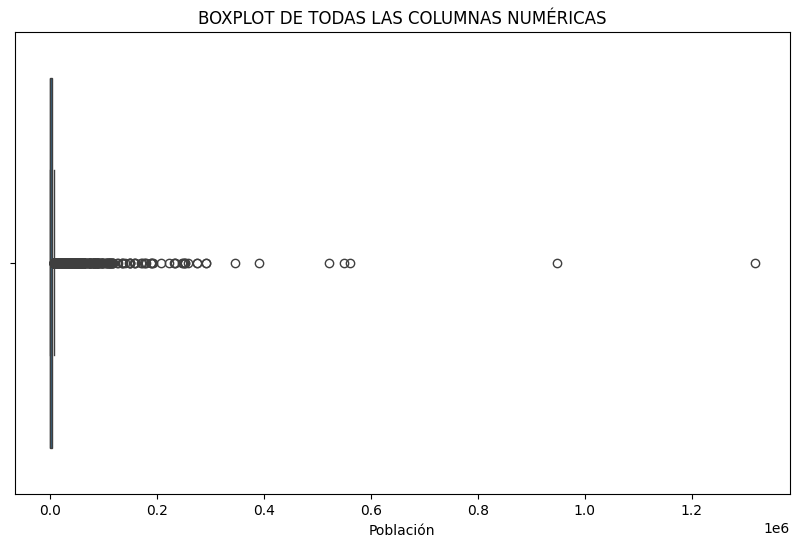

In [496]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df_mapa_conectividad.loc[:, 'Población'], orient='h')
plt.title('BOXPLOT DE TODAS LAS COLUMNAS NUMÉRICAS')
plt.show()

In [497]:
#REALIZAMOS PERCENTIL CON EL FIN DE ELIMINAR PERCENTIL
q1 = df_mapa_conectividad.loc[:, 'Población'].quantile(0.5)
q3 = df_mapa_conectividad.loc[:, 'Población'].quantile(0.95) 
iqr = q3 - q1

limite_inferior = 0
limite_superior = q3+1.5*iqr
df_mapa_conectividad_filtrado = df_mapa_conectividad.copy()
df_mapa_conectividad_filtrado[df_mapa_conectividad.columns[3]] = df_mapa_conectividad[df_mapa_conectividad.columns[3]][(df_mapa_conectividad[df_mapa_conectividad.columns[3]] >= limite_inferior) & (df_mapa_conectividad[df_mapa_conectividad.columns[3]] <= limite_superior)]

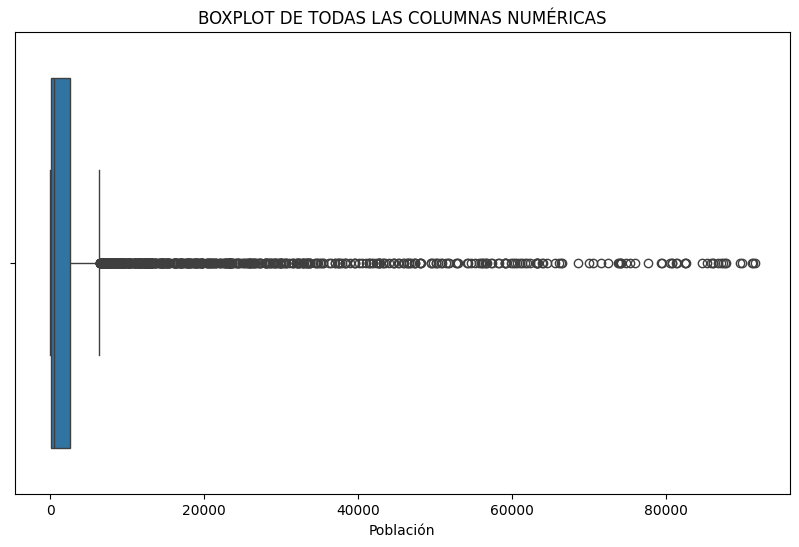

In [498]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df_mapa_conectividad_filtrado.loc[:, 'Población'], orient='h')
plt.title('BOXPLOT DE TODAS LAS COLUMNAS NUMÉRICAS')
plt.show()

## 2.8. CONJUNTO DE ARCHIVOS FINALES

In [499]:
df_acceso_velocidad_localidad_sr_final = df_acceso_velocidad_localidad_sr_filtrado.copy()
df_acceso_velocidad_provincia_cr_final = df_acceso_velocidad_provincia_cr.copy()
df_acceso_tecnologia_provincia_final = df_acceso_tecnologia_provincia.copy()
df_acceso_tecnologia_localidad_final = df_acceso_tecnologia_localidad_filtrado.copy()
df_penetracion_hogares_final = df_penetracion_hogares.copy()
df_ingresos_final = df_ingresos_filtrado.copy()
df_mapa_conectividad_final = df_mapa_conectividad_filtrado.copy()


In [500]:
df_acceso_velocidad_provincia_cr_final.head(3)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2023,4,Buenos Aires,26909.000,23962.000,228393.000,239339.000,246144.000,110876.000,4042646.000,93351.000,5011620.000
1,2023,4,Capital Federal,516.000,4544.000,26409.000,48083.000,33925.000,5829.000,1355061.000,0.000,1474367.000
2,2023,4,Catamarca,71.000,209.000,3065.000,3734.000,4423.000,1827.000,61181.000,77.000,74587.000


# 3. ANALISIS EXPLORATORIO DE DATOS - EDA

## 3.1 df_acceso_velocidad_localidad_final

- PARA ESTE DATAFRAME NO SE REALIZARÁ UN EDA, SIMPLEMENTE SE VOLVERÁ A REALIZAR UNA LIMPIEZA CON EL FIN DE VERIFICAR QUE ESTE ACORDE PARA LA IMPLEMENTACIÓN DE UN MAPA CON SUS COLUMNAS LATITUD Y LONGITUD

In [501]:
#SE OBSERVA SI ES QUE EXISTEN NULO DESPUES DE FILTRADO EL DATAFRAME
print(df_acceso_velocidad_localidad_sr_final.isnull().sum())
df_acceso_velocidad_localidad_sr_final.dropna(inplace=True)
print(df_acceso_velocidad_localidad_sr_final.isnull().sum())


Provincia      0
Partido        0
Localidad      0
Link Indec     0
Otros         88
              ..
850 Mbps       1
900 Mbps       1
999 Mbps      16
1000 Mbps     60
1024 Mbps      0
Length: 136, dtype: int64
Provincia     0
Partido       0
Localidad     0
Link Indec    0
Otros         0
             ..
850 Mbps      0
900 Mbps      0
999 Mbps      0
1000 Mbps     0
1024 Mbps     0
Length: 136, dtype: int64


In [502]:
#SE OBSERVAN LOS DUPLICADOS DEL DATAFRAME
df_acceso_velocidad_localidad_sr_filtrado.duplicated().sum()

0

REALIZADO LO ANTERIOR, SE PROCEDE CON EL PROXIMO DATAFRAME

## 3.2 df_acceso_velocidad_provincia_cr

In [503]:
df_acceso_velocidad_provincia_cr_final.head(3)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2023,4,Buenos Aires,26909.000,23962.000,228393.000,239339.000,246144.000,110876.000,4042646.000,93351.000,5011620.000
1,2023,4,Capital Federal,516.000,4544.000,26409.000,48083.000,33925.000,5829.000,1355061.000,0.000,1474367.000
2,2023,4,Catamarca,71.000,209.000,3065.000,3734.000,4423.000,1827.000,61181.000,77.000,74587.000


In [504]:
df_acceso_velocidad_provincia_cr_final.isnull().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  0
Total                  0
dtype: int64

In [505]:
df_acceso_velocidad_provincia_cr_final.duplicated().sum()

0

REALIZAMOS UN ANALISIS ENTRE LAS VARIABLES NUMÉRICAS 

In [506]:
df_acceso_velocidad_provincia_cr_final.columns

Index(['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total'],
      dtype='object')

####  POR AÑO

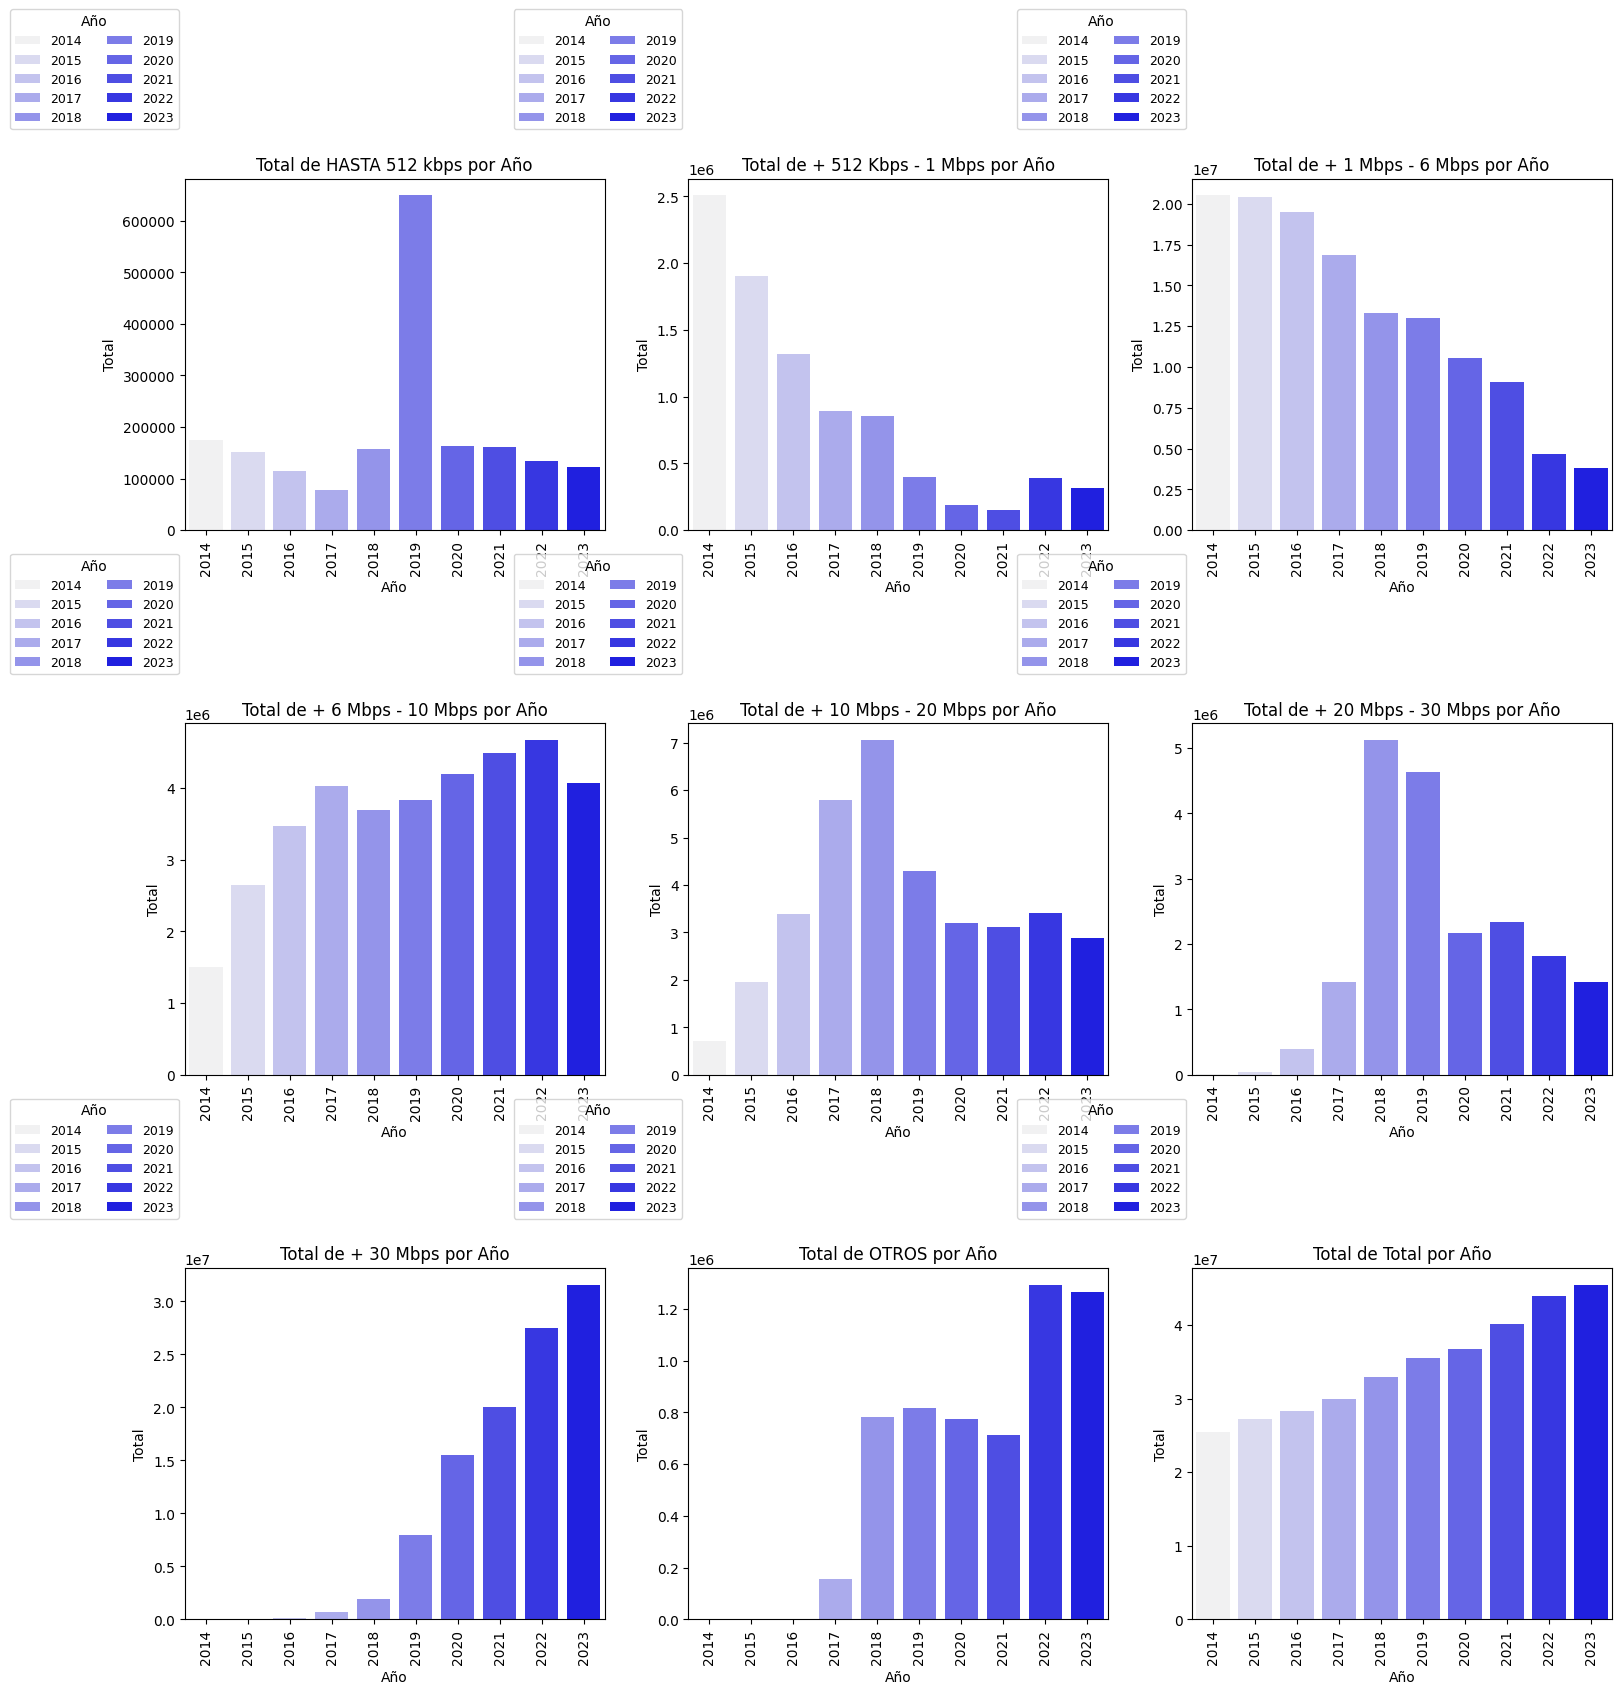

In [507]:
# Definir las columnas de velocidad a graficar
columnas_velocidad = [
    'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', 
    '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', 
    '+ 30 Mbps', 'OTROS', 'Total'
]

# Crear una figura con subplots
num_plots = len(columnas_velocidad)
max_cols = 3
rows = (num_plots + max_cols - 1) // max_cols  # Redondeo hacia arriba
fig, axes = plt.subplots(rows, max_cols, figsize=(5 * max_cols, 5 * rows))

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Ajustar la separación entre filas y columnas
plt.subplots_adjust(hspace=0.55, wspace=0.2)



# Iterar sobre las columnas de velocidad y crear los gráficos
for idx, col in enumerate(columnas_velocidad):
    row = idx // max_cols
    col_idx = idx % max_cols
    ax = axes[row][col_idx] if rows > 1 else axes[col_idx]
    
    df_grouped = df_acceso_velocidad_provincia_cr_final.groupby(['Año'])[col].sum().reset_index()
    # Definir una paleta de colores personalizada
    custom_palette = sns.light_palette("blue", len(df_grouped['Año'].unique()))
    sns.barplot(data=df_grouped, x='Año', hue='Año', y=col, ax=ax, palette=custom_palette)
    
    ax.set_title(f'Total de {col} por Año')
    ax.set_xlabel('Año')
    ax.set_ylabel('Total')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.legend(loc='upper right', title='Año', bbox_to_anchor=(0., 1.5), prop={'size':9}, ncol=2)
    


# Eliminar subplots vacíos
for idx in range(num_plots, rows * max_cols):
    row = idx // max_cols
    col_idx = idx % max_cols
    fig.delaxes(axes[row][col_idx] if rows > 1 else axes[col_idx])

# Mostrar la figura completa
plt.show()

- HASTA 512 KBPS: EN PROMEDIO SE TIENE UN ACCESO CONSTANTE PARA TODOS LOS AÑOS A EXCEPCIÓN DEL AÑO 2019, LO CUAL PEUDE SER DEBIDO  A LAS PANDEMIA
- +512 KPBS A 1 MBPS: EN ESTE CASO SE APRECIA UNA ALTA FRECUENCIA PARA EL AÑO 2014 DONDE LUEGO FUE DISMINUYENDO LA TENDENCIA PARA ESTE RANGO DE INTERNET
- +1 MBPS A 6 MBPS: AL IGUAL QUE EL RANGO ANTERIOR SE TIENE UNA GRAN CONCENTRANCIÓN ENTRE LOS AÑOS 2014 Y 2016 DONDE LUEGO FUE DISMINUYENDO ESTA OPCIÓN
- +6 MBPS A 10 MBPS: AQUÍ, A PRINCIPIOS DEL AÑO 2014 SE TIENE UNA BAJA FRECUENCIA PERO PASADO ESTE AÑO SE GENERÓ UN AUMENTO PRACTICAMENTE LINEAL A LO LARGO DE LOS AÑOS
- +10 MBPS A 20 MBPS: PARA EL AÑO 2014 SE TIENE UNA BAJA FRECUENCIA DONDE LUEGO AUMENTO CONSIDERABLEMENTE HASTA EL AÑO 2018 PARA LUEGO DESCENDER LOS SIGUIENTES AÑOS Y MANTENERSE PRACTICAMENTE CONSTANTE EN LOS SIGUIENTES AÑOS
- +20 MBPS A 30 MBPS: AL INICIO (2014) NO SE TIENE ACCESO A ESTE RANGO DE INTERNET, DESDE EL 2015 SE COMIENZA A TENER UN LEVE INCREMENTO EN LOS SIGUIENTES DOS AÑOS PARA GENERARSE UN GRAN AUMENTO EN LOS AÑOS 2018 Y 2019, PARA LUEGO DESCENDER A LA MITAD DE ESTOS ACCESOS EN LOS SIGUIENTES AÑOS.
- +30 MBPS: ENTRE LOS AÑOS 2014 Y 2015 NO SE TIENE PRACTICAMENTE ACCESO A ESTE RANGO DE INTERNET, LOS SIGUIENTES AÑOS SE APRECIA UN AUMENTO EXPONENCIAL PARA LOS SIGUIENTES AÑOS, ESPECIALMENTE LUEGO DE  2019 HASTA TENER SU PEAK EN EL AÑO 2023
- OTROS: ENTRE LOS AÑOS 2014 Y 2016 NO SE TIENE ACCESO A OTROS RANGOS DE INTERNER PERO LLEGADO EL AÑO 2017 SE GENERA UN LEVE INCREMENTO PARA LUEGO VERSE AUMENTANDO CONSTANTEMENTE ENTRE LOS AÑOS 2017 Y 2021, PARA LUEGO TENER UN BOOM EN EL AÑO 2022 Y 2023

Tendencias generales:

El tráfico de internet ha aumentado exponencialmente entre 2014 y 2023.
Los rangos de velocidad más altos (por encima de 10 Mbps) han experimentado un mayor crecimiento.
Los rangos de velocidad más bajos (por debajo de 1 Mbps) han experimentado una disminución significativa en su participación del tráfico total.

#### POR TRIMESTRE

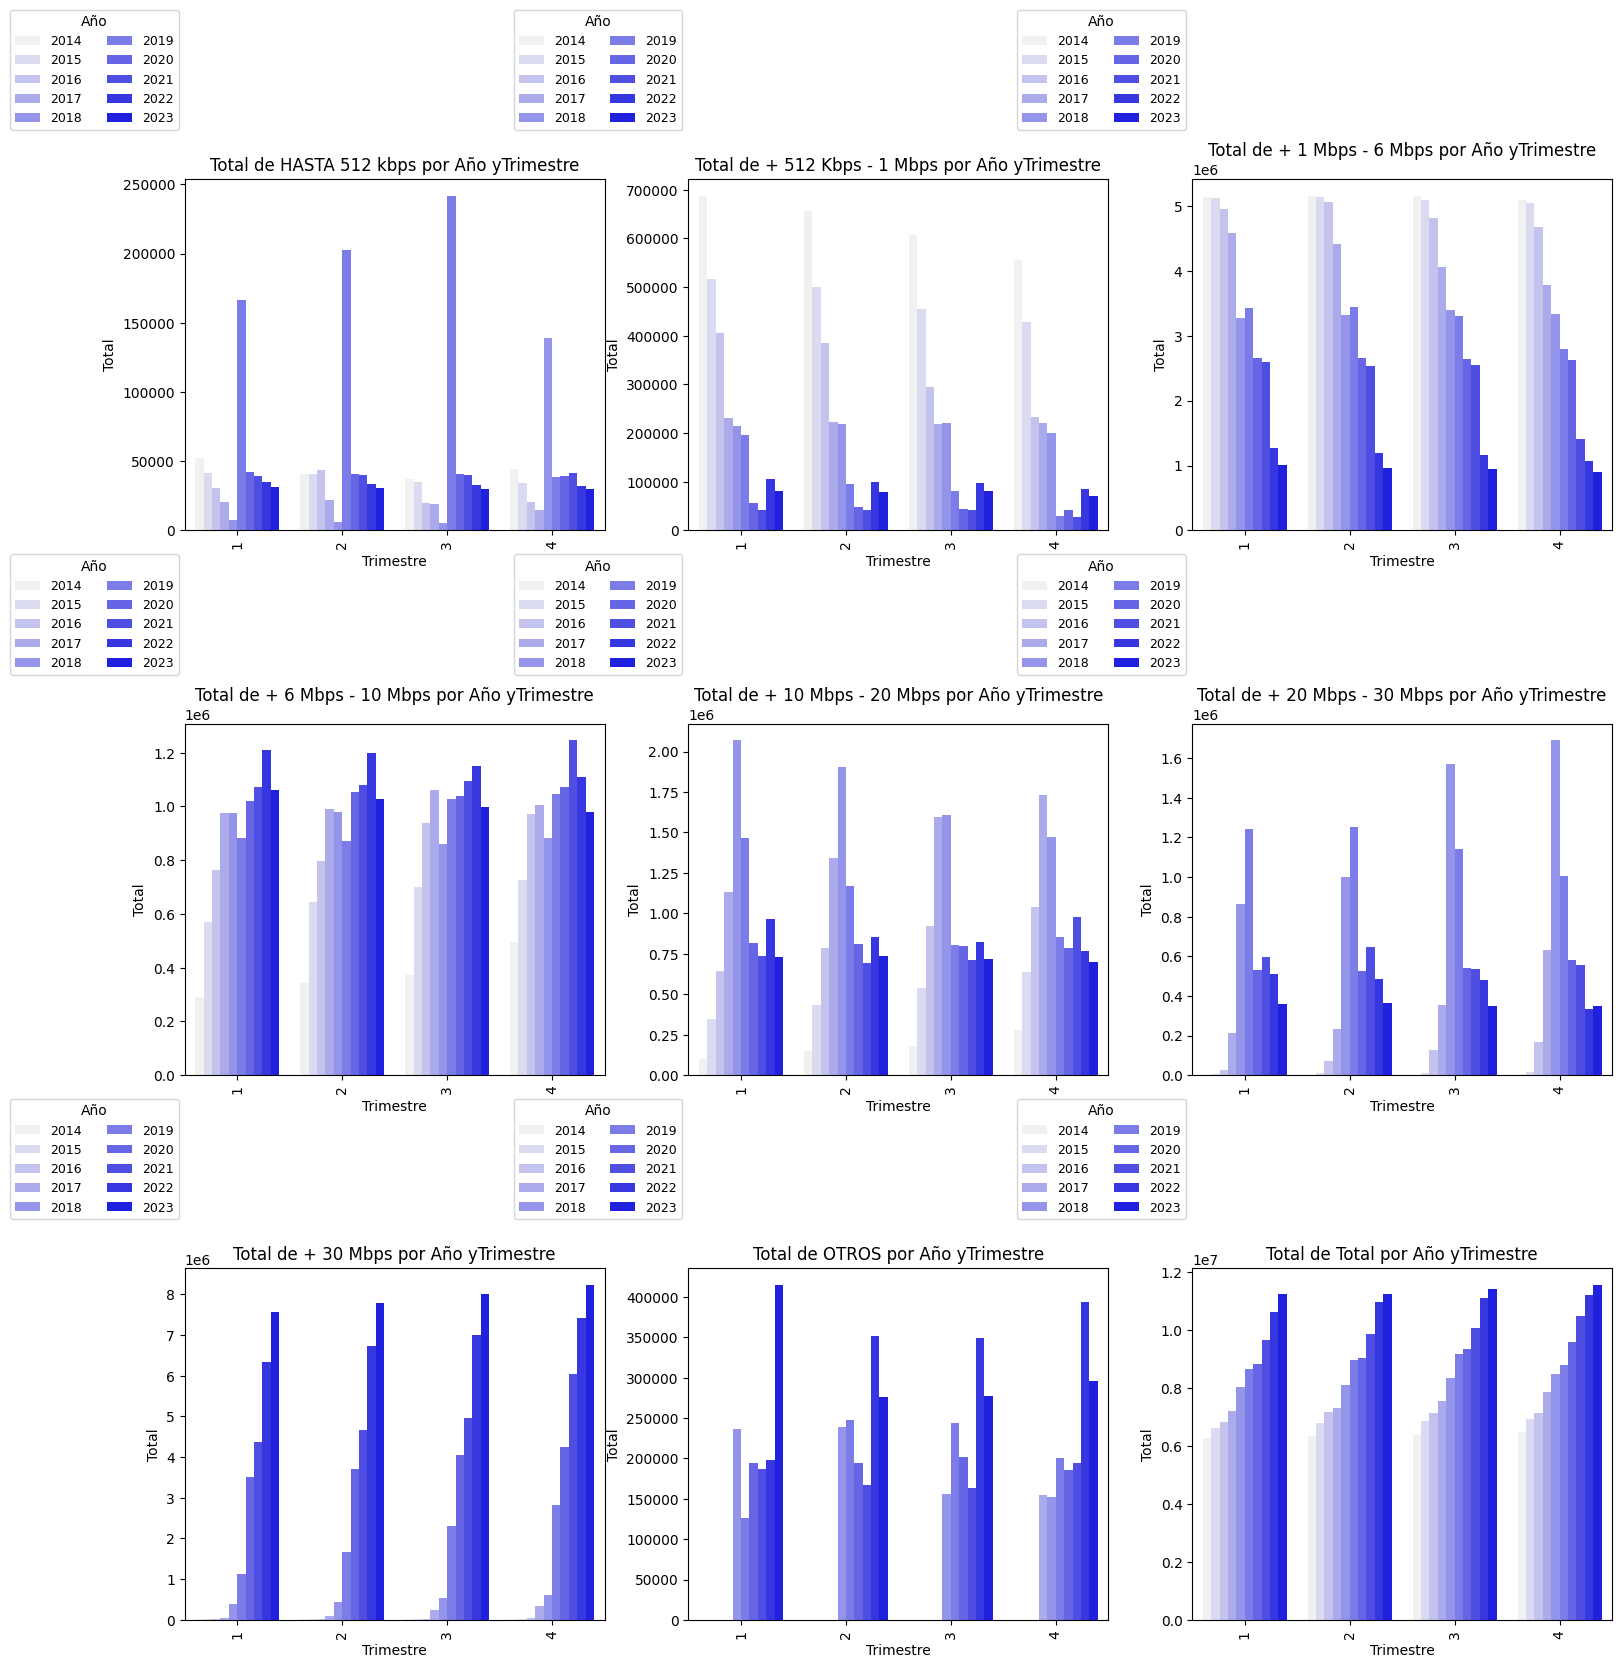

In [508]:
# Definir las columnas de velocidad a graficar
columnas_velocidad = [
    'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', 
    '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', 
    '+ 30 Mbps', 'OTROS', 'Total'
]

# Crear una figura con subplots
num_plots = len(columnas_velocidad)
max_cols = 3
rows = (num_plots + max_cols - 1) // max_cols  # Redondeo hacia arriba
fig, axes = plt.subplots(rows, max_cols, figsize=(5 * max_cols, 5 * rows))

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Ajustar la separación entre filas y columnas
plt.subplots_adjust(hspace=0.55, wspace=0.2)



# Iterar sobre las columnas de velocidad y crear los gráficos
for idx, col in enumerate(columnas_velocidad):
    row = idx // max_cols
    col_idx = idx % max_cols
    ax = axes[row][col_idx] if rows > 1 else axes[col_idx]
    
    df_grouped = df_acceso_velocidad_provincia_cr_final.groupby(['Trimestre', 'Año'])[col].sum().reset_index()
    # Definir una paleta de colores personalizada
    custom_palette = sns.light_palette("blue", len(df_grouped['Año'].unique()))
    sns.barplot(data=df_grouped, x='Trimestre', hue='Año', y=col, ax=ax, palette=custom_palette)
    
    ax.set_title(f'Total de {col} por Año yTrimestre')
    ax.set_xlabel('Trimestre')
    ax.set_ylabel('Total')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.legend(loc='upper right', title='Año', bbox_to_anchor=(0., 1.5), prop={'size':9}, ncol=2)
    


# Eliminar subplots vacíos
for idx in range(num_plots, rows * max_cols):
    row = idx // max_cols
    col_idx = idx % max_cols
    fig.delaxes(axes[row][col_idx] if rows > 1 else axes[col_idx])

# Mostrar la figura completa
plt.show()

- Tendencia general:

El acceso a internet en Argentina ha experimentado un crecimiento constante en los últimos años.
Este crecimiento se ha acelerado en los últimos años.
La mayoría de la población argentina tiene acceso a internet en la actualidad.

- Evolución por año:

El número de personas con acceso a internet ha aumentado de manera constante.
Este aumento ha sido más rápido en los últimos años.
La penetración de internet en Argentina es alta.

- Evolución por velocidad de conexión:

Las conexiones de baja velocidad han disminuido.
Las conexiones de alta velocidad han aumentado.
La velocidad promedio de las conexiones ha mejorado.

REALIZAMOS UN ANALISIS ENTRE LAS VARIABLES CATEGÓRICAS Y NUMÉRICAS 

In [509]:
df_acceso_velocidad_provincia_cr_final.columns

Index(['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total'],
      dtype='object')

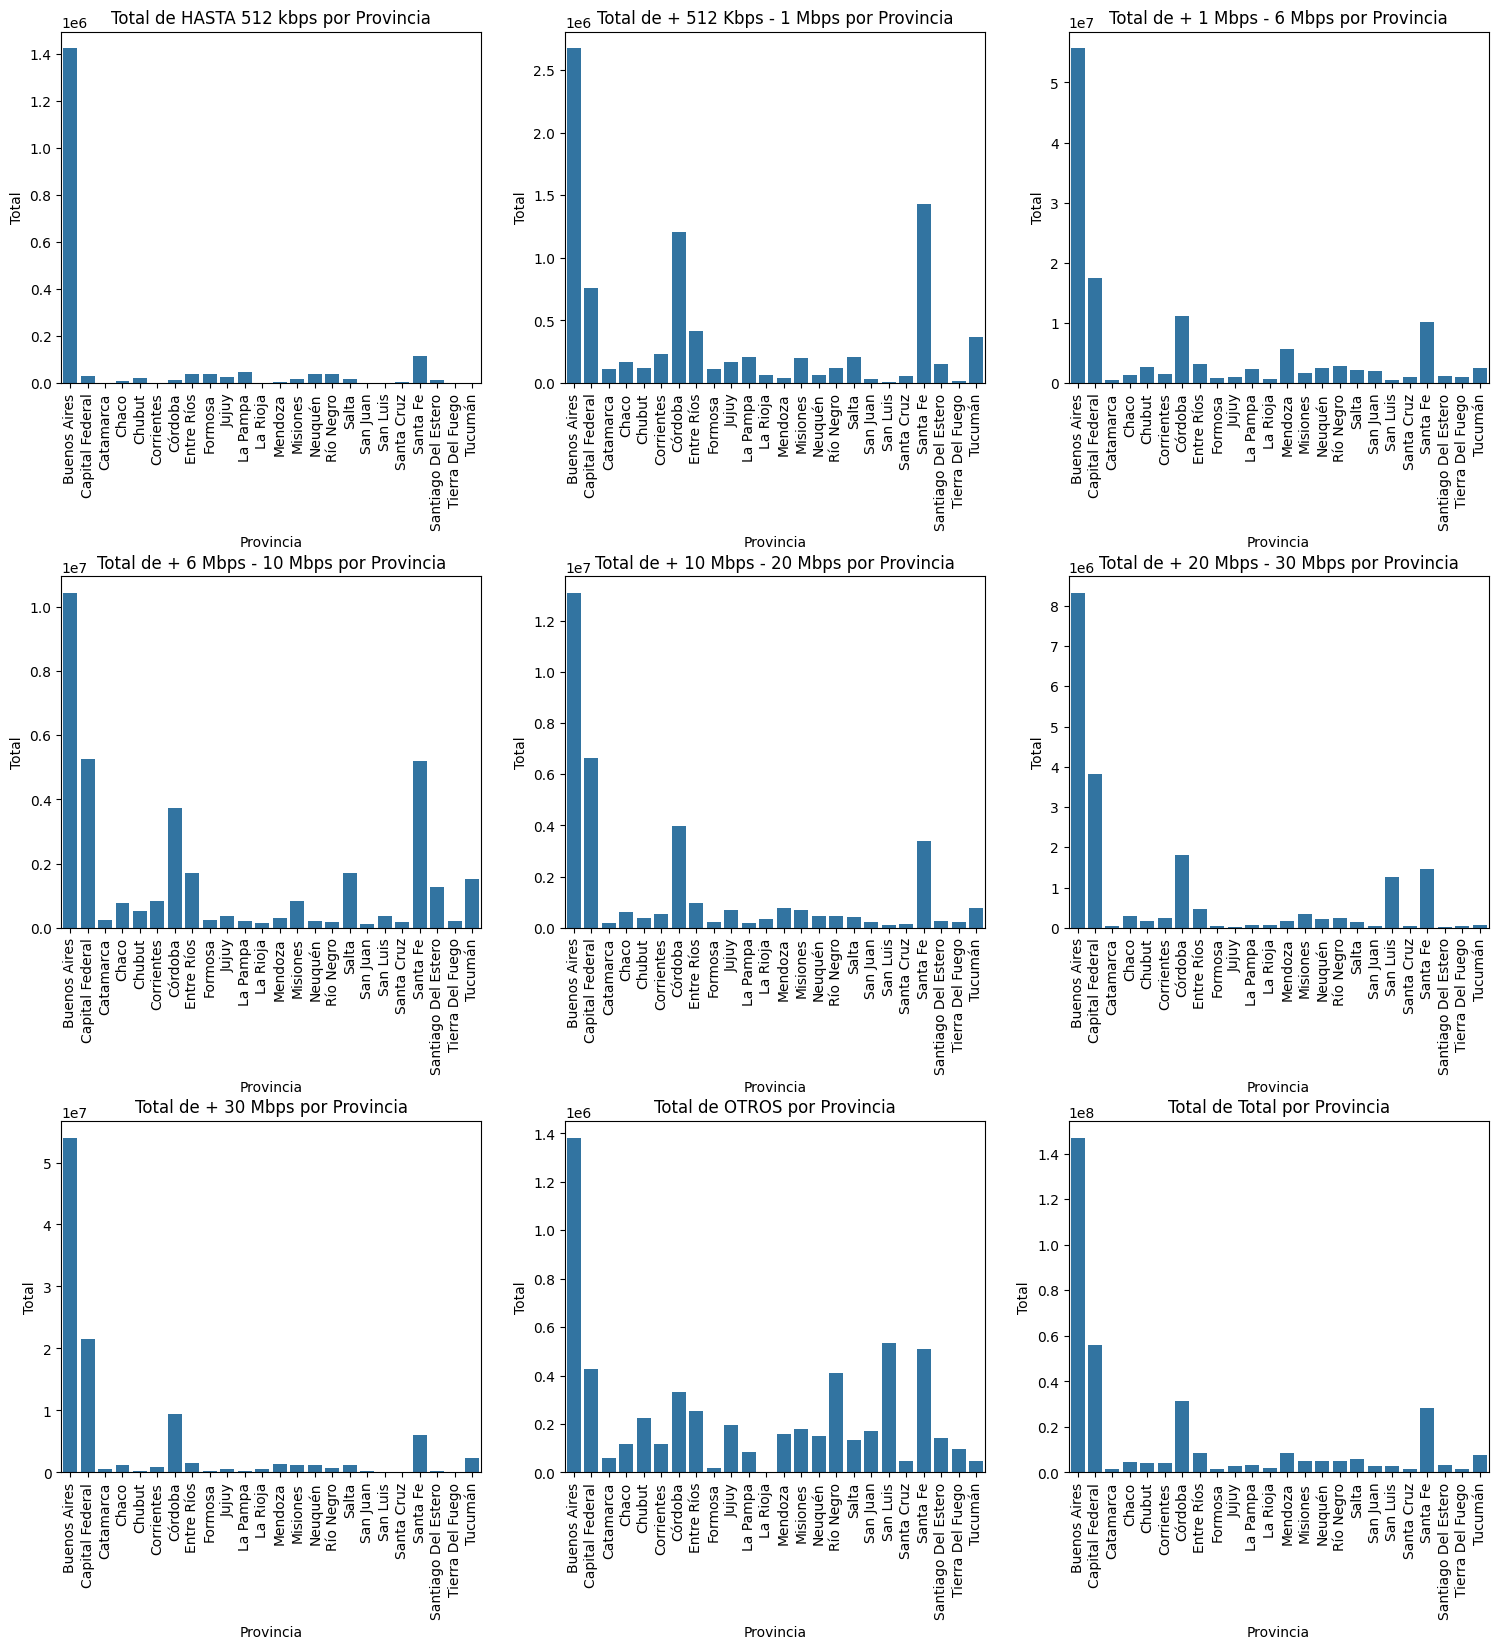

In [510]:
# Definir las columnas de velocidad a graficar
columnas_velocidad = [
    'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', 
    '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', 
    '+ 30 Mbps', 'OTROS', 'Total'
]

# Crear una figura con subplots
num_plots = len(columnas_velocidad)
max_cols = 3
rows = (num_plots + max_cols - 1) // max_cols  # Redondeo hacia arriba
fig, axes = plt.subplots(rows, max_cols, figsize=(5 * max_cols, 5 * rows))

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Ajustar la separación entre filas y columnas
plt.subplots_adjust(hspace=0.55, wspace=0.2)

# Iterar sobre las columnas de velocidad y crear los gráficos
for idx, col in enumerate(columnas_velocidad):
    row = idx // max_cols
    col_idx = idx % max_cols
    ax = axes[row][col_idx] if rows > 1 else axes[col_idx]
    
    df_grouped = df_acceso_velocidad_provincia_cr_final.groupby(['Provincia'])[col].sum().reset_index()
    sns.barplot(data=df_grouped, x='Provincia', y=col, ax=ax)
    
    ax.set_title(f'Total de {col} por Provincia')
    ax.set_xlabel('Provincia')
    ax.set_ylabel('Total')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    


# Eliminar subplots vacíos
for idx in range(num_plots, rows * max_cols):
    row = idx // max_cols
    col_idx = idx % max_cols
    fig.delaxes(axes[row][col_idx] if rows > 1 else axes[col_idx])

# Mostrar la figura completa
plt.show()

- HASTA 512 KBPS: LOS MÁS PRESENTES EN ESTE RANGO SON BUENOS AIRES Y SANTA FÉ. LOS QUE PRACTICAMENTE NO TIENEN ACCESO EN ESTE RANGO SON CATAMARCA, CORRIENTES, LA RIOJA, SAN JUAN, SAN LUIS, TIERRA DEL FUEGO Y TUCUMAN
- +512 KPBS A 1 MBPS: LOS CUATRO MÁS ALTOS EN ESTE SON BUENOS AIRES, CAPITAL FEDERAL, CORDOBA Y SANTA FÉ. Y LOS QUE PRESENTEN UN MENOR ACCESO EN ESTE RANGO SON MENDOZA, SAN JUAN, SAN LUIS Y TIERRA DEL FUEGO
- +1 MBPS A 6 MBPS: ESTE RANGO LOS CON MAYOR ACCESO SON BUENOS AIRES, CAPITAL FEDERAL, CORDOBA Y SANTA FÉ. LOS MENOS PRESENTE SON CATAMARCA, LA RIOJA Y SAN LUIS
- +6 MBPS A 10 MBPS: LOS CUATRO QUE SE ENCUENTRAN MÁS PRESENTE AQUÍ SON BUENOS AIRES, CAPITAL FEDERAL, CORDOBA Y SANTA FÉ. LOS MENOS PRESENTES SON
- +10 MBPS A 20 MBPS: LOS CON MAYOR CANTIDAD DE ACCESO EN ESTE RAGO CORRESPONDE A BUENOS AIRES, CAPITAL FEDERAL, CORDOBA Y SANTA FÉ. LOS CON MENOR CANTIDAD SON CATAMARCA, FORMOSA, LA PAMPA, Y SAN LUIS
- +20 MBPS A 30 MBPS: EN ESTE CASO LOS DE MAYOR ACCESO SON BUENOS AIRES, CAPITAL FEDERAL, CÓRDOBA, SAN LUIS Y SANTA FÉ. LAS CON CASI NULO ACCESO SON CATAMARCA, FORMOSA, JUJUY, SAN JUAN, SANTA CRUZ, SANTIAGO DEL ESTERO, TIERRA DEL FUEGO Y TUCUMÁN.
- +30 MBPS: LOS DE MAYOR ACCESO SON BUENOS AIRES, CAPITAL FEDERAL, CÓRDOBA Y SANTA FÉ. LOS CON MENOR CANTIDAD SON CATARMARCA, CHUBUT, FORMOSA, LA PAMPA, LA RIOJA, SAN UAN, SAN LUIZ, SANTA CRUZ, SANTIAGO DEL ESTERO Y TIERRA DEL FUEGO.
- OTROS: AQUÍ, BUENOS AIRES SIGUE SIENDO EL DE MAYOR CANTIDAD PERO EL RESTO DE PROVINCIAS TIENE UNA MAYOR PRESENCIA. POR OTRO LADO, LA RIOJA NO PRESENTA NADA.

CONCLUSIÓN: EN GENERAL, BUENOS AIRES ES LA PROVINCIA CON UN BUEN ACCESO A INTERNET INDEPENDIENTE DE LA CALIDAD, SEGUIDOS POR CAPITAL FEDERAL, CÓRDOBA, SANTA FÉ Y TUCUMÁN. A MI PARECER SON LAS PROVINCIAS MÁS CONOCIDAS FUERA DE ARGENTINA POR LO CUAL ES DE ESPERAR TENER UN MAYOR ACCESO EN ESTAS. POR OTRO LADO, SE OBSERVA QUE EL RESTO DE PROVINCIAS PRESENTAN UN ACCESO EN TOTAL MUY CONSTANTE LO CUAL SE PODRÍA MEJORAR BASTANTE SI ES QUE SE LES DIERA UN MAYOR ENFOQUE PARA MEJORAR LOS ACCESOS A SECTORES/ZONAS LAS CUALES PUEDAN ESTAR MÁS ALEJADAS DE LA CAPITAL DE ARGENTINA, EN ESPECIAL PARA CATAMARCA, FORMOSA, SANTA CRUZ Y TIERRA DEL FUEGO LAS CUALES SON LAS QUE PRESENTAN LA MENOR CANTIDAD DE ACCESO EN TOTAL A INTERNET.

---

## 3.3 DF_TECNOLOGIA_PROVINCIA_FINAL

VERIFICAMOS PRIMERO LOS NULOS Y LOS DUPLICADOS PARA TENER NUESTRO DATAFRAME LIMPIO

In [511]:
df_acceso_tecnologia_provincia_final.isnull().sum()


Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

In [512]:
df_acceso_tecnologia_provincia_final.duplicated().sum()

0

In [513]:
df_acceso_tecnologia_provincia_final.columns

Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')

####    RELACIÓN ENTRE VARIABLES NUMÉRICAS

se grafica esto con el fin de conocer los cambios en la tecnologia para el acceso a internet segun la provincia

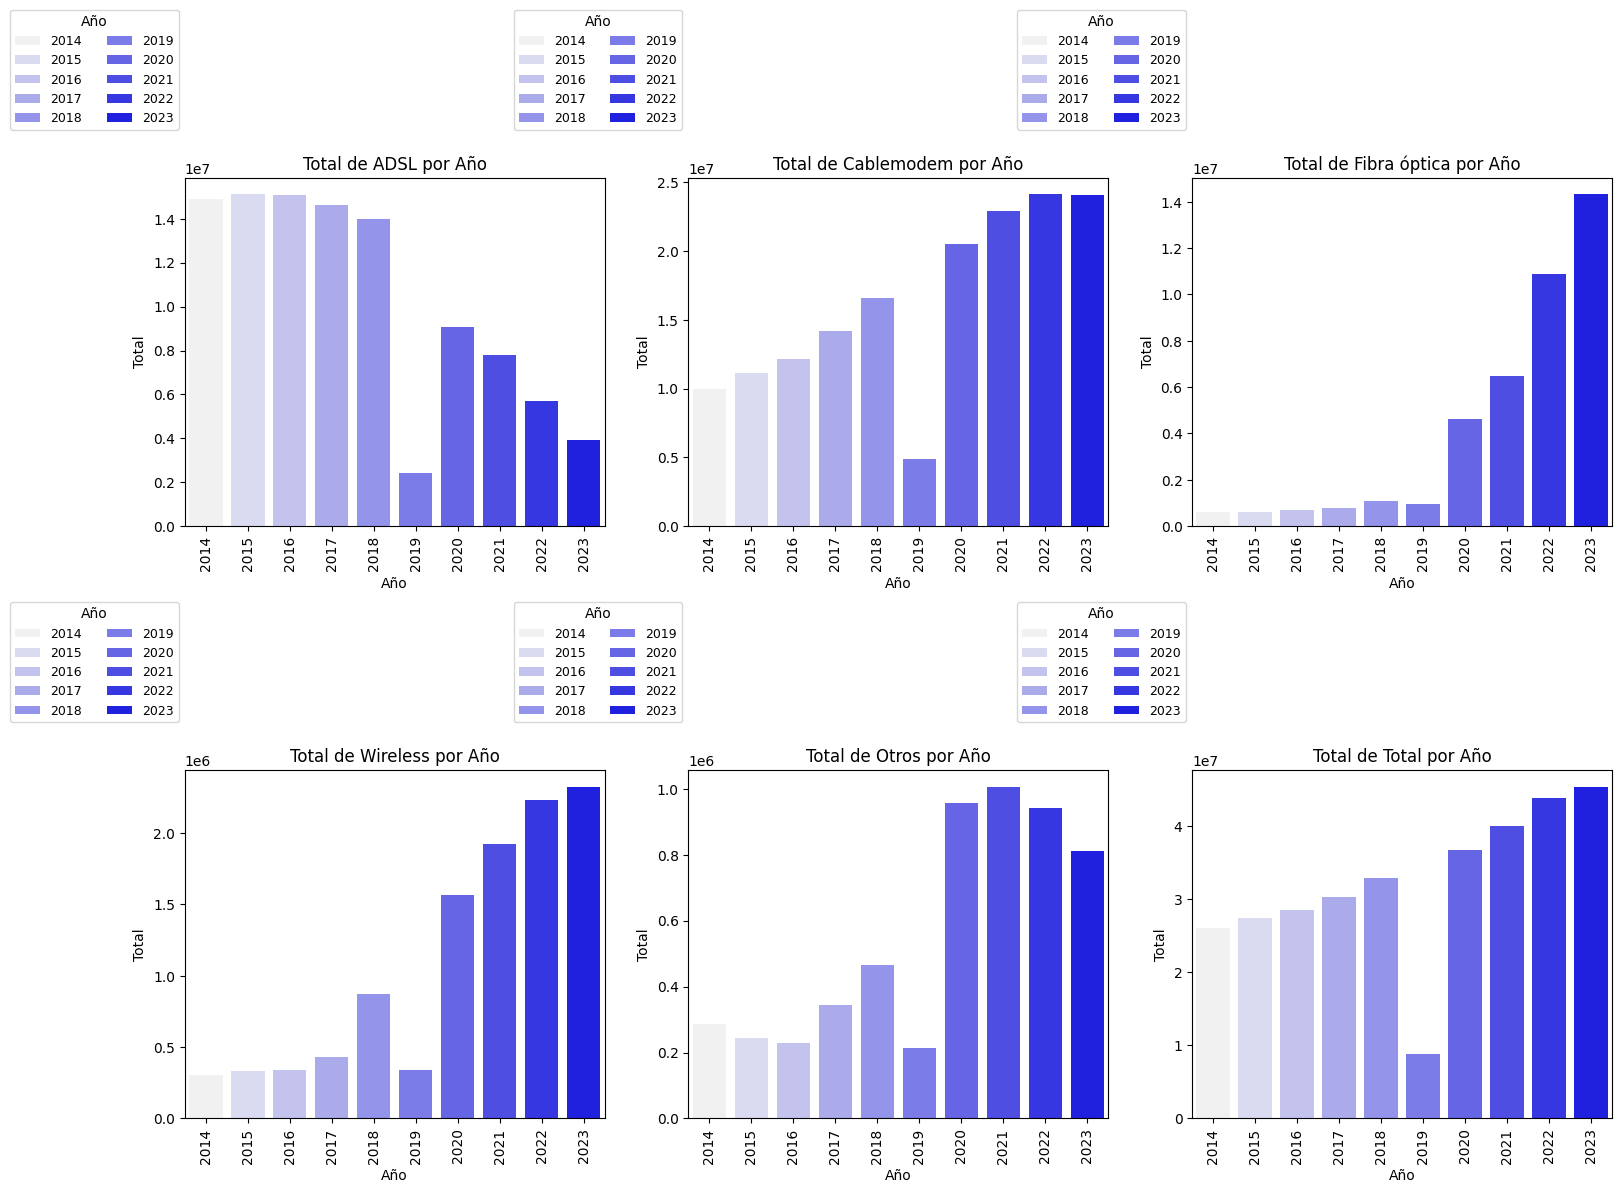

In [514]:
# Definir las columnas de velocidad a graficar
columnas_velocidad = [
    'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'
]

# Crear una figura con subplots
num_plots = len(columnas_velocidad)
max_cols = 3
rows = (num_plots + max_cols - 1) // max_cols  # Redondeo hacia arriba
fig, axes = plt.subplots(rows, max_cols, figsize=(5 * max_cols, 5 * rows))

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Ajustar la separación entre filas y columnas
plt.subplots_adjust(hspace=0.7, wspace=0.2)



# Iterar sobre las columnas de velocidad y crear los gráficos
for idx, col in enumerate(columnas_velocidad):
    row = idx // max_cols
    col_idx = idx % max_cols
    ax = axes[row][col_idx] if rows > 1 else axes[col_idx]
    
    df_grouped = df_acceso_tecnologia_provincia_final.groupby(['Año'])[col].sum().reset_index()
    # Definir una paleta de colores personalizada
    custom_palette = sns.light_palette("blue", len(df_grouped['Año'].unique()))
    sns.barplot(data=df_grouped, x='Año', hue='Año', y=col, ax=ax, palette=custom_palette)
    
    ax.set_title(f'Total de {col} por Año')
    ax.set_xlabel('Año')
    ax.set_ylabel('Total')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.legend(loc='upper right', title='Año', bbox_to_anchor=(0., 1.5), prop={'size':9}, ncol=2)
    


# Eliminar subplots vacíos
for idx in range(num_plots, rows * max_cols):
    row = idx // max_cols
    col_idx = idx % max_cols
    fig.delaxes(axes[row][col_idx] if rows > 1 else axes[col_idx])

# Mostrar la figura completa
plt.show()

- ADSL:SE APRECIA QUE A LO LARGO DE LOS AÑOS SE HA IDO GENERANDO UNA DISMINUCIÓN EN LA IMPLEMENTACIÓN A ESTE METODO DE INTERNET
- CABLEMODEM: SE TIENE UN AUMENTO SOSTENIDO A LO LARGO DE LOS AÑOS 
- FIBRA ÓPRICA:SE APRECIA UN ACCESO MINIMO Y CONSTANTE ENTRE LOS AÑOS 2014 Y 2019. PASADO ESTOS AÑOS SE OBSERVA UN CRECIMIENTO BASTANTE GRANDE PARA LOS SIGUIENTES AÑOS
- WIRELESS:ENTER 2014 Y 2017 SE TIENE UN ACCESO CONSTANTE Y BAJO PARA ESTOS AÑOS PARA LUEGO GENERAR GRANDES AUMENTOS PARA ESETE TIPO
- OTROS: SE APRECIA UN AUMENTO VARIABLE PARA OTROS TIPOS DE ACCESO A INTERNET ENTRE LOS CUALES PUEDEN SER, SATELITAL, MOVIL, ETC.

CONCLUSIÓN: EN GENERAL SE APRECIA UN AUMENTO POR LA OBTENCIÓN DE UN ACCESO A INTERNET. SE APRECIA QUE EL AÑO 2019 PRODUJO UNA DISMINUCIÓN A ACCESO A INTERNET POR EL HECHO DE QUE LA GENTE EVITABA EL CONTACTO A CONTRATAR NUEVAS TECNOLOGÍAS Y QUIZAS OPTAR POR LA ELECCIÓN DE MEJORAR SU INTERNET EN VEZ DE ACCEDER A UNA NEUVA. POR OTRO LADO, LA TECNOLOGIA ADSL HA IDO DISMINUYENDO CON EL PASAR DE LOS AÑOS, TECNOLOGÍA QUE ES CONSIDERADA ANTIGUA Y LA CUAL PUEDE LLEGAR A QUEDAR OBSOLETA. LA GENTE ESTA PREFIRIENDO EL USO DE WIRELESS, FIBRA OPTICA, CABLE MODEM U OTRO TIPO DE INTERNET EN VEZ DE ADSL.

In [515]:
df_acceso_tecnologia_provincia_final.columns

Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')

#### RELACION VARIABLES CATEGORIAS Y NUMÉRICAS

SE REALIZA ESTO CON EL FIN DE OBTENER LA RELACIÓN ENTRE LA PROVINCIA Y LOS VALORES DE ACCESO A INTERNET SEGUN EL TIPO DE TECNOLOGIA QUE POSEEN

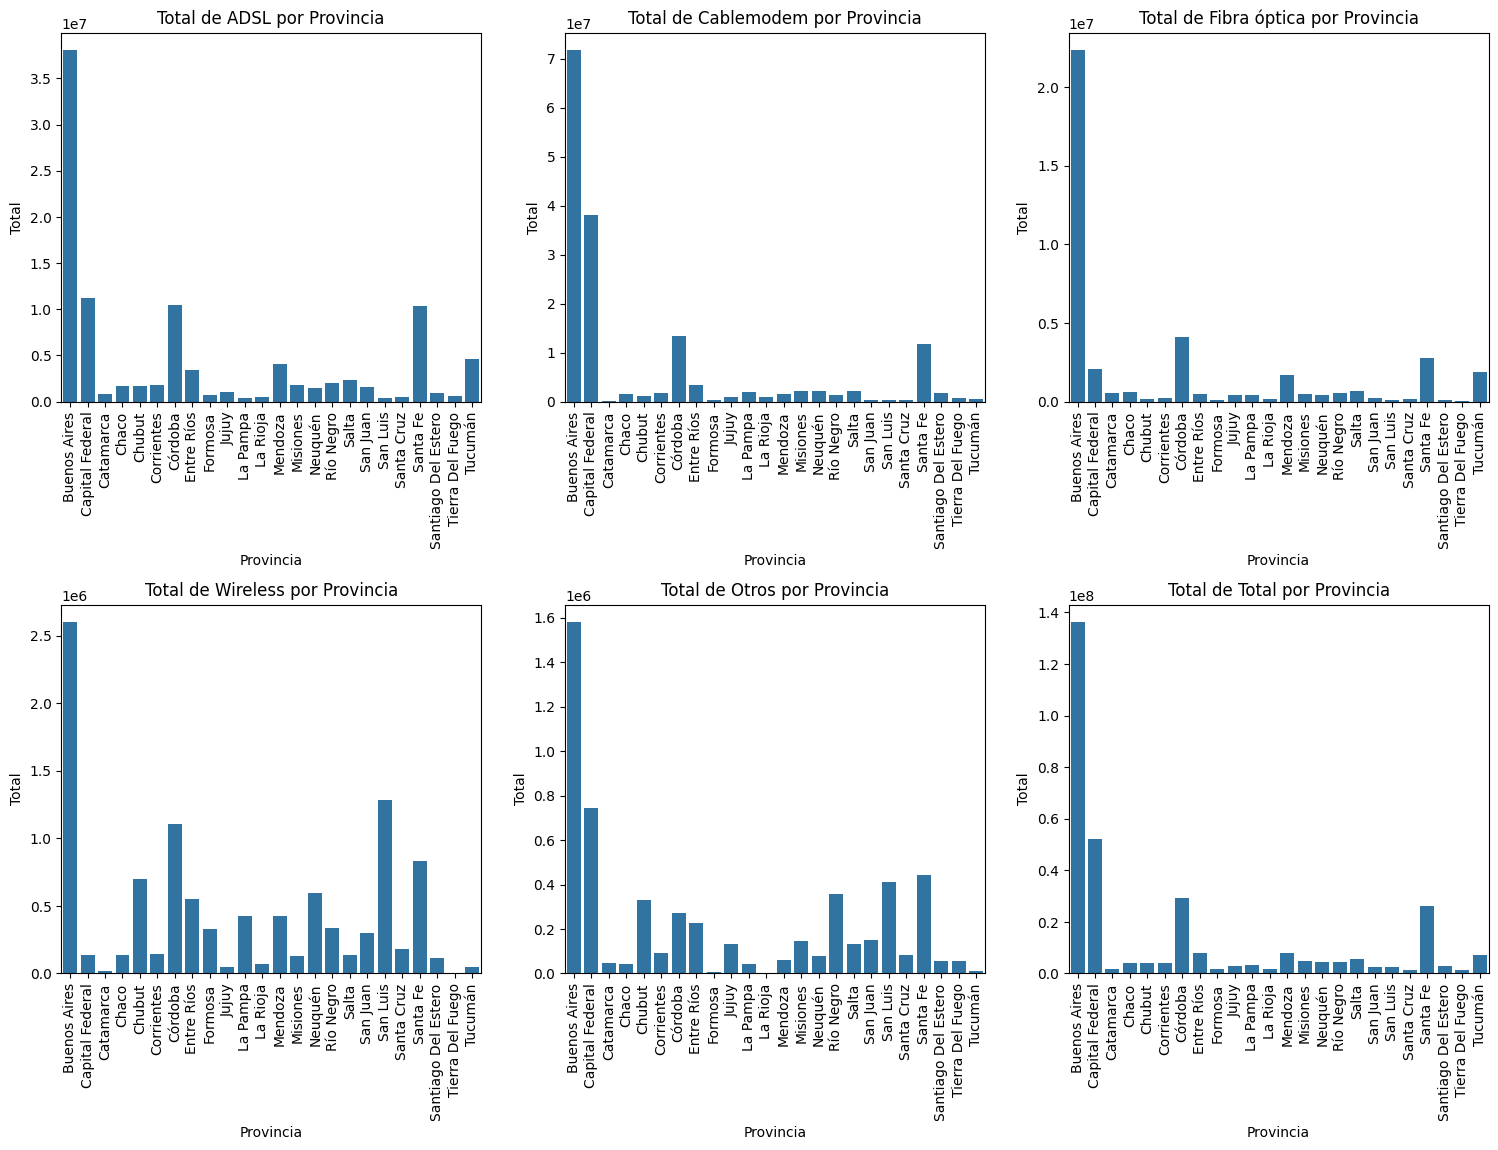

In [516]:
# Definir las columnas de velocidad a graficar
columnas_velocidad = [
    'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'
]

# Crear una figura con subplots
num_plots = len(columnas_velocidad)
max_cols = 3
rows = (num_plots + max_cols - 1) // max_cols  # Redondeo hacia arriba
fig, axes = plt.subplots(rows, max_cols, figsize=(5 * max_cols, 5 * rows))

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Ajustar la separación entre filas y columnas
plt.subplots_adjust(hspace=0.55, wspace=0.2)

# Iterar sobre las columnas de velocidad y crear los gráficos
for idx, col in enumerate(columnas_velocidad):
    row = idx // max_cols
    col_idx = idx % max_cols
    ax = axes[row][col_idx] if rows > 1 else axes[col_idx]
    
    df_grouped = df_acceso_tecnologia_provincia_final.groupby(['Provincia'])[col].sum().reset_index()
    sns.barplot(data=df_grouped, x='Provincia', y=col, ax=ax)
    
    ax.set_title(f'Total de {col} por Provincia')
    ax.set_xlabel('Provincia')
    ax.set_ylabel('Total')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    


# Eliminar subplots vacíos
for idx in range(num_plots, rows * max_cols):
    row = idx // max_cols
    col_idx = idx % max_cols
    fig.delaxes(axes[row][col_idx] if rows > 1 else axes[col_idx])

# Mostrar la figura completa
plt.show()


Los gráficos muestran que la cantidad de ADSL, Cablemodem, Fibra óptica, Wireless y Otros varía considerablemente entre las provincias de Argentina. La provincia de Buenos Aires tiene la mayor cantidad de conexiones en todas las categorías, seguida de Capital Federal, Córdoba y Santa Fe. Las provincias del norte y sur del país tienen las menores cantidades de conexiones.

CONCLUSIÓN: LAS CONEXIONES A INTERNET ESTÁN ENFOCADAS PRINCIPALMENTE EN LAS PROVINCIAS QUE SON MAYORITARIAMENTE CONOCIDAS EN COMPARACIÓN A LAS PROVINCIAS DEL NORTE Y SUR DEL ARGENTINA. CASO SIMILAR LO ES PARA CHILE, DONDE EN LAS ZONA CENTRAL ES DONDE SE TIENE UNA MEJOR RECEPCIÓN DE LAS SEÑALES DE INTERNET/MOVIL SIENDO UNA OPCIÓN MÁS FACTIBLE PARA ESTAR REGIONES EL USO DE TECNOLOGIAS SATELITALES.

## 3.4 df_acceso_tecnologia_localidad

VERIFICAMOS LOS NULOS Y DUPLICADOS PARA ASEGURAR UN DATAFRAME LIMPIO. POR OTRO LADO, TENER EN CUENTA QUE EN ESTE DATAFRAME NO SE REALIZARÁ EDA POR SU EXTENSIÓN DE LOCALIDADES Y TENIENDO EN CUENTA QUE TENEMOS YA UN DATAFRAME POR PROVINCIAS LO CUAL ES MÁS PRESENTATIVO A MI PARECER.

In [517]:
print(df_acceso_tecnologia_localidad_final.isnull().sum())
df_acceso_tecnologia_localidad_final.dropna(inplace=True)
print(df_acceso_tecnologia_localidad_final.isnull().sum())


Provincia          0
Partido            0
Localidad          0
Link Indec         0
ADSL              45
CABLEMODEM        57
DIAL UP          106
FIBRA OPTICA      45
OTROS             94
SATELITAL         26
WIMAX             14
WIRELESS          45
Total general     53
dtype: int64
Provincia        0
Partido          0
Localidad        0
Link Indec       0
ADSL             0
CABLEMODEM       0
DIAL UP          0
FIBRA OPTICA     0
OTROS            0
SATELITAL        0
WIMAX            0
WIRELESS         0
Total general    0
dtype: int64


In [518]:
df_acceso_tecnologia_localidad_final.duplicated().sum()

0

## 3.5 df_penetracion_hogares

VERIFICAMOS LOS NULOS Y LOS DUPLICADOS

In [519]:
df_penetracion_hogares_final.head(3)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2023,4,Buenos Aires,80.960
1,2023,4,Capital Federal,117.020
2,2023,4,Catamarca,68.630


In [520]:
df_penetracion_hogares_final.isnull().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

In [521]:
df_penetracion_hogares_final.duplicated().sum()

0

In [522]:
df_penetracion_hogares_final.columns

Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares'], dtype='object')

In [523]:
df_penetracion_hogares_final.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,960.000,960.000,960.000
mean,2018.500,2.500,51.662
std,2.874,1.119,23.898
min,2014.000,1.000,9.347
25%,2016.000,1.750,32.857
50%,2018.500,2.500,48.817
75%,2021.000,3.250,65.117
max,2023.000,4.000,124.061


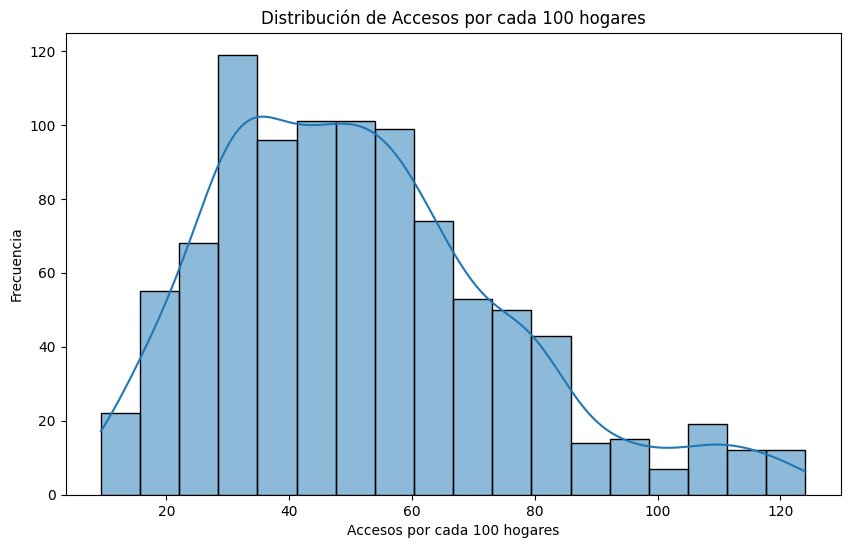

In [524]:
# Distribución de 'Accesos por cada 100 hogares'
plt.figure(figsize=(10, 6))
sns.histplot(df_penetracion_hogares_final['Accesos por cada 100 hogares'], kde=True)
plt.title('Distribución de Accesos por cada 100 hogares')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Frecuencia')
plt.show()

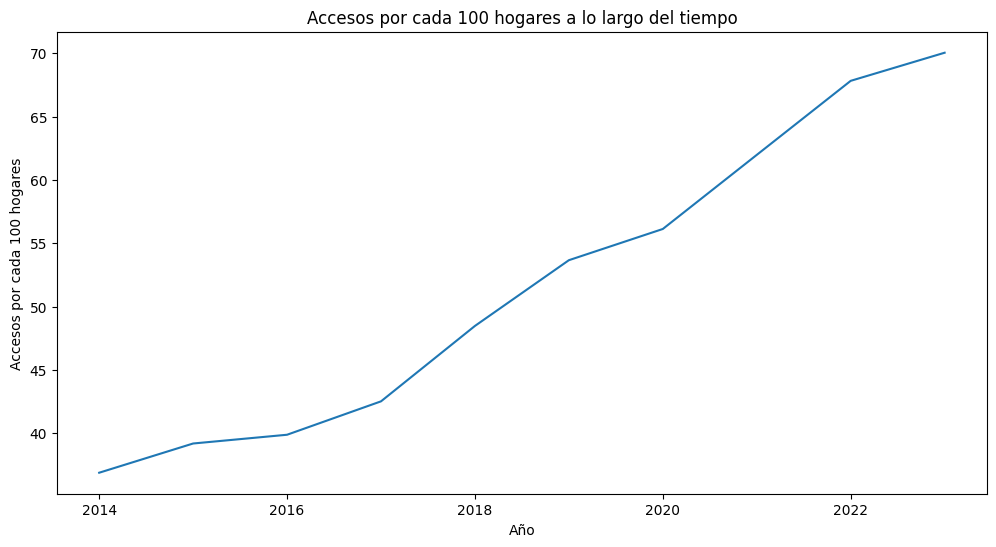

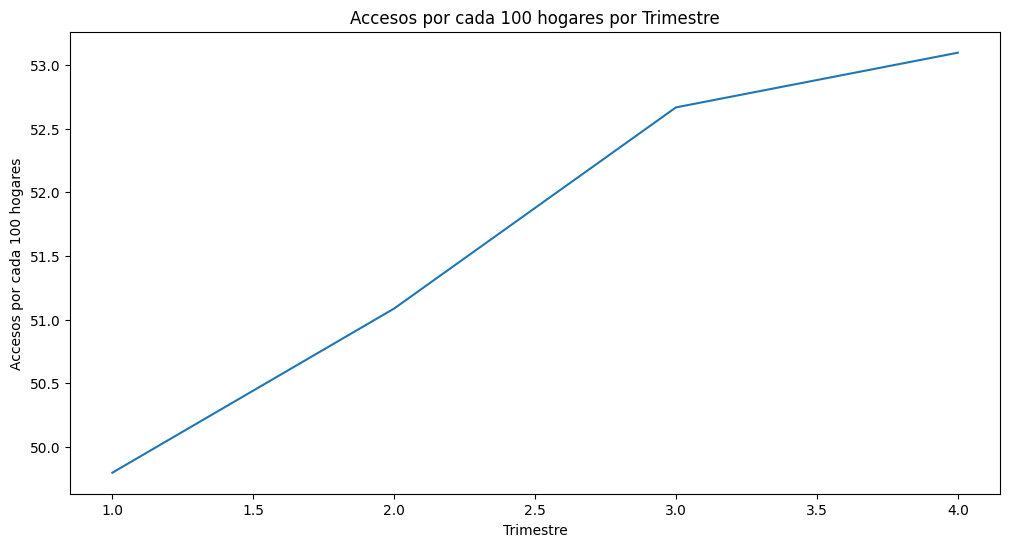

In [525]:
# Accesos por año
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_penetracion_hogares_final, x='Año', y='Accesos por cada 100 hogares', errorbar=None)
plt.title('Accesos por cada 100 hogares a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.show()

# Accesos por trimestre
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_penetracion_hogares_final, x='Trimestre', y='Accesos por cada 100 hogares', errorbar=None)
plt.title('Accesos por cada 100 hogares por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Accesos por cada 100 hogares')
plt.show()

Observando las tendencias es notorio que se ha incrementado el acceso a internet en argentina

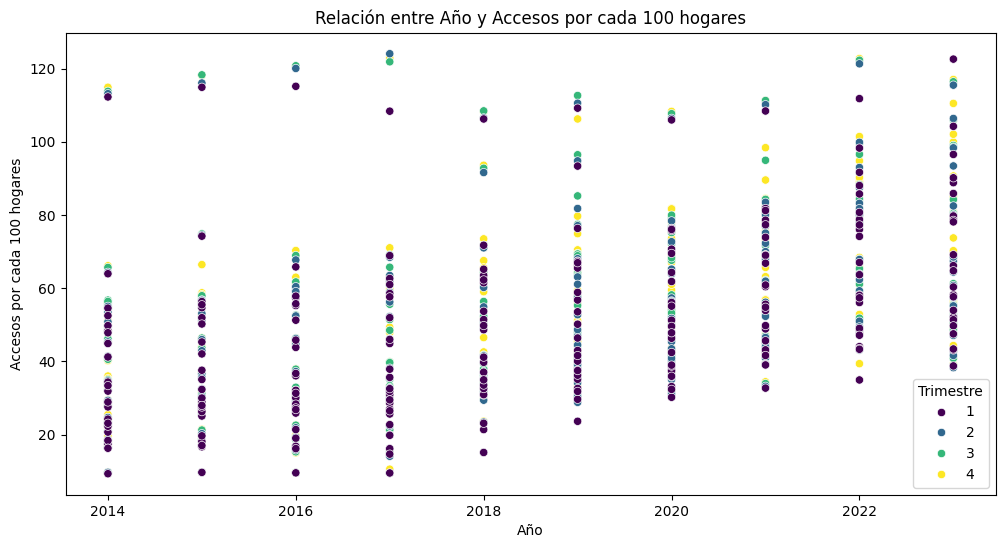

In [526]:
# Relación entre Año y Trimestre con Accesos por cada 100 hogares
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_penetracion_hogares_final, x='Año', y='Accesos por cada 100 hogares', hue='Trimestre', palette='viridis')
plt.title('Relación entre Año y Accesos por cada 100 hogares')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.legend(title='Trimestre')
plt.show()

Tendencia general: El número de accesos por cada 100 hogares ha aumentado de forma constante desde 2014 hasta 2022.
Variaciones por trimestre:
Primer trimestre: El número de accesos por cada 100 hogares suele ser más bajo en el primer trimestre del año.
Segundo trimestre: El número de accesos por cada 100 hogares suele aumentar en el segundo trimestre del año.
Tercer trimestre: El número de accesos por cada 100 hogares suele ser el más alto en el tercer trimestre del año.
Cuarto trimestre: El número de accesos por cada 100 hogares suele disminuir en el cuarto trimestre del año.

Al observar la variación por años se presenta un aumente del acceso por cada 100 hogares, lo cual puede verse influido por la necesidad de este para la amyoria de las actividades que se realizan a diario.

## 3.6 df_ingresos_final

VERIFICAMOS LOS NULOS Y DUPLICADOS

In [527]:
print(df_ingresos_final.isnull().sum())
df_ingresos_final.dropna(inplace=True)
print(df_ingresos_final.isnull().sum())


Año                          0
Trimestre                    0
Ingresos (miles de pesos)    5
Periodo                      0
dtype: int64
Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64


In [528]:
df_ingresos_final.duplicated().sum()

0

RELACIONES ENTRE VARIABLES NUMÉRICAS

In [529]:
df_ingresos_final.columns

Index(['Año', 'Trimestre', 'Ingresos (miles de pesos)', 'Periodo'], dtype='object')

In [530]:
df_ingresos_final.info(9)

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 5 to 39
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        35 non-null     int64  
 1   Trimestre                  35 non-null     int64  
 2   Ingresos (miles de pesos)  35 non-null     float64
 3   Periodo                    35 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


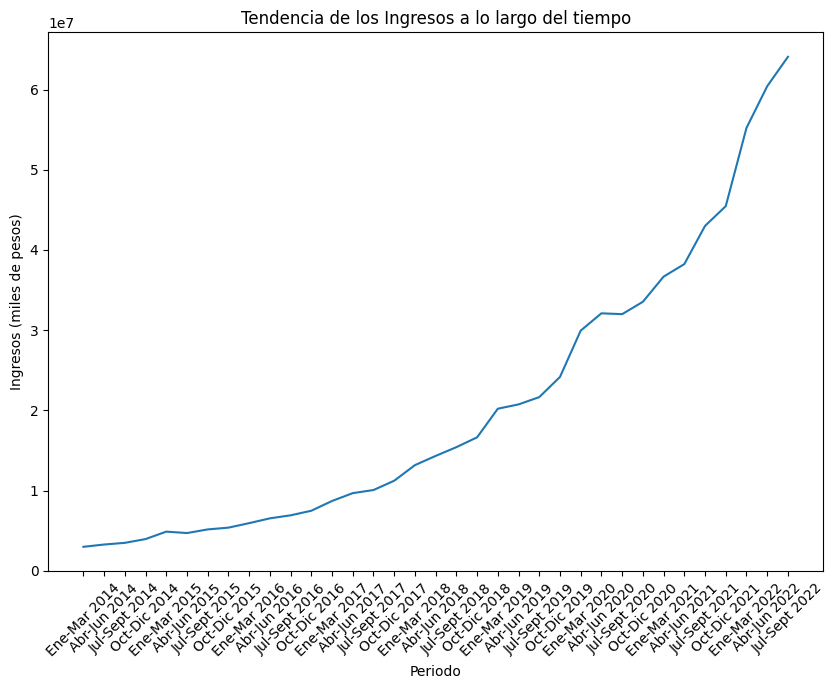

In [531]:
# Análisis de tendencia temporal
plt.figure(figsize=(10, 7))
sns.lineplot(x='Periodo', y='Ingresos (miles de pesos)', data=df_ingresos_final)
plt.title('Tendencia de los Ingresos a lo largo del tiempo')
plt.xlabel('Periodo')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=45)
plt.gca().invert_xaxis()  # Invertir el eje x

plt.show()

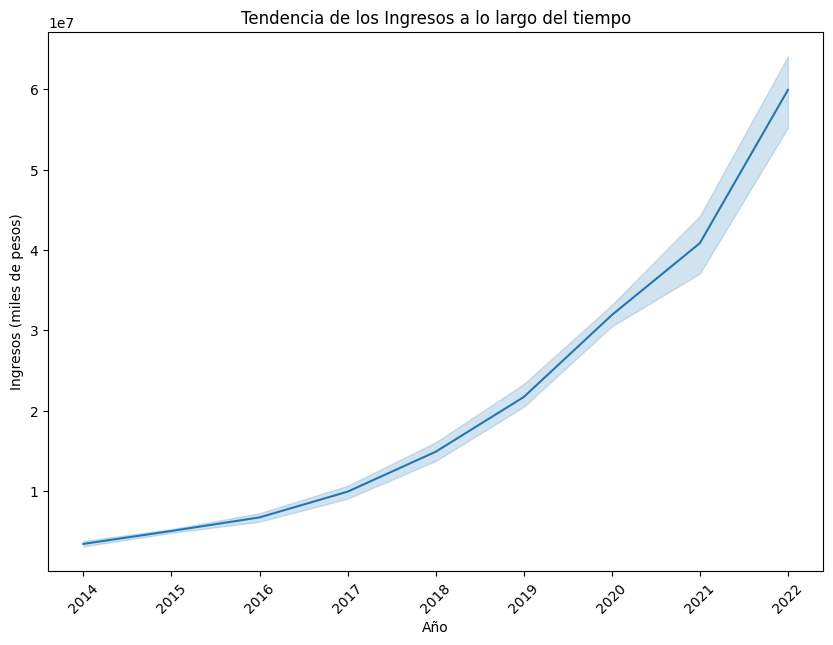

In [532]:
# Análisis de tendencia temporal
plt.figure(figsize=(10, 7))
sns.lineplot(x='Año', y='Ingresos (miles de pesos)', data=df_ingresos_final)
plt.title('Tendencia de los Ingresos a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=45)

plt.show()

##### Convertirmos los ingresos en miles de pesos a DOLAR OFICIAL Y DOLAR BLUE

In [543]:
dolar_blue = 1385
df_ingresos_final['Ingresos(Dolar Blue)'] = (df_ingresos_final['Ingresos (miles de pesos)']*1000)/dolar_blue


con el paso del tiempo se aprecia que los ingresos han ido en un incremento exponencial, siendo esto buenas noticias para el negocio.

## 3.7 df_mapa_conectividad

A este no se le palicará Eda ya que se utilizará para formar los mapas de conectividad simplemente

VERIFICAMOS LOS NULOS Y DUPLICADOS

In [534]:
print(df_mapa_conectividad_final.isnull().sum())
df_mapa_conectividad_final.dropna(inplace=True)
print(df_mapa_conectividad_final.isnull().sum())


Provincia          0
Partido            0
Localidad          0
Población         72
ADSL               0
Cablemódem         0
Dial Up            0
Fibra óptica       0
Satelital          0
Wireless           0
Telefonía Fija     0
3G                 0
4G                 0
Link Indec         0
Latitud            0
Longitud           0
dtype: int64
Provincia         0
Partido           0
Localidad         0
Población         0
ADSL              0
Cablemódem        0
Dial Up           0
Fibra óptica      0
Satelital         0
Wireless          0
Telefonía Fija    0
3G                0
4G                0
Link Indec        0
Latitud           0
Longitud          0
dtype: int64


In [535]:
df_mapa_conectividad_final.columns

Index(['Provincia', 'Partido', 'Localidad', 'Población', 'ADSL', 'Cablemódem',
       'Dial Up', 'Fibra óptica', 'Satelital', 'Wireless', 'Telefonía Fija',
       '3G', '4G', 'Link Indec', 'Latitud', 'Longitud'],
      dtype='object')

In [536]:
df_mapa_conectividad_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4179 entries, 0 to 4310
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provincia       4179 non-null   object 
 1   Partido         4179 non-null   object 
 2   Localidad       4179 non-null   object 
 3   Población       4179 non-null   float64
 4   ADSL            4179 non-null   bool   
 5   Cablemódem      4179 non-null   bool   
 6   Dial Up         4179 non-null   bool   
 7   Fibra óptica    4179 non-null   bool   
 8   Satelital       4179 non-null   bool   
 9   Wireless        4179 non-null   bool   
 10  Telefonía Fija  4179 non-null   bool   
 11  3G              4179 non-null   bool   
 12  4G              4179 non-null   bool   
 13  Link Indec      4179 non-null   float64
 14  Latitud         4179 non-null   float64
 15  Longitud        4179 non-null   float64
dtypes: bool(9), float64(4), object(3)
memory usage: 297.9+ KB


# 4. KPIS

## 4.1 RENDIMIENDO DE ACCESO

In [552]:
# Supongamos que tus columnas de período son 'Año' y 'Trimestre'
df_acceso_velocidad_provincia_cr_final = df_acceso_velocidad_provincia_cr_final.sort_values(by=['Año', 'Trimestre'])

# Desplazar la columna 'Total' hacia arriba
df_acceso_velocidad_provincia_cr_final['Total_shifted'] = df_acceso_velocidad_provincia_cr_final['Total'].shift()

# Calcular la diferencia
df_acceso_velocidad_provincia_cr_final['Rendimiento_acceso_internet'] = ((df_acceso_velocidad_provincia_cr_final['Total'] - df_acceso_velocidad_provincia_cr_final['Total_shifted'])/df_acceso_velocidad_provincia_cr_final['Total_shifted'])

# Eliminar la columna temporal 'Total_shifted' si ya no es necesaria
df_acceso_velocidad_provincia_cr_final.drop(columns=['Total_shifted'], inplace=True)

# Mostrar el DataFrame resultante
df_acceso_velocidad_provincia_cr_final.head(3)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total,Rendimiento_acceso_internet
936,2014,1,Buenos Aires,8469.000,171244.480,2279875.000,121787.120,38923.320,206.160,4037.000,0.000,2624542.080,NaN
937,2014,1,Capital Federal,852.000,88825.520,1096050.000,70292.880,38797.680,54.840,6208.000,0.000,1301080.920,-0.504
938,2014,1,Catamarca,19.000,9147.000,13330.000,1672.000,64.000,0.000,0.000,0.000,24232.000,-0.981


In [553]:
df_ingresos_final.head(3)

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Ingresos(Dolar Oficial),Ingresos(Dolar Blue),Rendimiento_ingresos
39,2014,1,2984054.209,Ene-Mar 2014,3311935.859,2154551.775,NaN
38,2014,2,3270816.204,Abr-Jun 2014,3630206.664,2361600.147,0.096
37,2014,3,3478637.743,Jul-Sept 2014,3860863.200,2511651.800,0.064


In [554]:
#ordenamos por cronologicamente
df_ingresos_final = df_ingresos_final.sort_values(by=['Año', 'Trimestre'])

# Desplazar la columna 'Ingreso' hacia arriba
df_ingresos_final['Total_shifted'] = df_ingresos_final['Ingresos(Dolar Blue)'].shift()

# Calcular la diferencia
df_ingresos_final['Rendimiento_ingresos'] = ((df_ingresos_final['Ingresos(Dolar Blue)'] - df_ingresos_final['Total_shifted'])/df_ingresos_final['Total_shifted'])

# Eliminar la columna temporal 'Total_shifted' si ya no es necesaria
df_ingresos_final.drop(columns=['Total_shifted'], inplace=True)

# Mostrar el DataFrame resultante
df_ingresos_final.head(3)

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Ingresos(Dolar Oficial),Ingresos(Dolar Blue),Rendimiento_ingresos
39,2014,1,2984054.209,Ene-Mar 2014,3311935.859,2154551.775,NaN
38,2014,2,3270816.204,Abr-Jun 2014,3630206.664,2361600.147,0.096
37,2014,3,3478637.743,Jul-Sept 2014,3860863.200,2511651.800,0.064


In [560]:
df_penetracion_hogares_final[df_penetracion_hogares_final['Provincia'] == 'Catamarca' ]

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Rendimiento_acceso_internet_por_100hogares
938,2014,1,Catamarca,24.252,-0.784
914,2014,2,Catamarca,24.703,-0.782
890,2014,3,Catamarca,24.706,-0.783
866,2014,4,Catamarca,25.514,-0.778
842,2015,1,Catamarca,25.109,-0.781
818,2015,2,Catamarca,25.453,-0.781
794,2015,3,Catamarca,25.864,-0.781
770,2015,4,Catamarca,26.239,-0.778
746,2016,1,Catamarca,25.910,-0.775
722,2016,2,Catamarca,26.074,-0.783


In [559]:
#ordenamos por cronologicamente
df_penetracion_hogares_final = df_penetracion_hogares_final.sort_values(by=['Año', 'Trimestre', 'Provincia'])

# Desplazar la columna 'Ingreso' hacia arriba
df_penetracion_hogares_final['Total_shifted'] = df_penetracion_hogares_final['Accesos por cada 100 hogares'].shift()

# Calcular la diferencia
df_penetracion_hogares_final['Rendimiento_acceso_internet_por_100hogares'] = ((df_penetracion_hogares_final['Accesos por cada 100 hogares'] - df_penetracion_hogares_final['Total_shifted'])/df_penetracion_hogares_final['Total_shifted'])


# Eliminar la columna temporal 'Total_shifted' si ya no es necesaria
df_penetracion_hogares_final.drop(columns=['Total_shifted'], inplace=True)

# Mostrar el DataFrame resultante
df_penetracion_hogares_final.head(3)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Rendimiento_acceso_internet_por_100hogares
936,2014,1,Buenos Aires,54.570,NaN
937,2014,1,Capital Federal,112.254,1.057
938,2014,1,Catamarca,24.252,-0.784


In [556]:
# Exportar el DataFrame a un archivo csv
df_acceso_velocidad_provincia_cr_final.to_excel('dataset/df_acceso_velocidad_provincia_cr_final.xlsx', index=False)
df_acceso_tecnologia_provincia_final.to_excel('dataset/df_acceso_tecnologia_provincia_final.xlsx', index=False)
df_penetracion_hogares_final.to_excel('dataset/df_penetracion_hogares_final.xlsx', index=False)
df_ingresos_final.to_excel('dataset/df_ingresos_final.xlsx', index=False)
df_acceso_velocidad_localidad_sr_final.to_excel('dataset/df_acceso_velocidad_localidad_sr_final.xlsx', index=False)
df_acceso_tecnologia_localidad_final.to_excel('dataset/df_acceso_tecnologia_localidad_final.xlsx', index=False)
df_mapa_conectividad_final.to_excel('dataset/df_mapa_conectividad_final.xlsx', index=False)

